<a href="https://colab.research.google.com/github/TehLedRed/SpringerManuscript/blob/main/Simulation/Poisson/Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from scipy import optimize
from scipy.stats import expon
import os.path
import matplotlib.pyplot as plt
!pip install ipython-autotime
%load_ext autotime
!pip install import-ipynb
import import_ipynb
from google.colab import output
output.clear()

time: 11.7 s (started: 2023-10-06 14:23:11 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1min 45s (started: 2023-10-06 14:23:23 +00:00)


In [ ]:
%cd /content/drive/MyDrive/Mestrado/PCM/simulation/Negative binomial
import generateData
import nbCure

/content/drive/MyDrive/Mestrado/PCM/simulation/Negative binomial
importing Jupyter notebook from generateData.ipynb
importing Jupyter notebook from nbCure.ipynb
time: 2.18 s (started: 2023-10-06 14:25:10 +00:00)


# Neural network model

In [ ]:
class Model1(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=4,
            kernel_size=[5, 5],
            padding="same",
            activation=tf.nn.relu,
            dtype=tf.float32
        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=12,
            kernel_size=[5, 5],
            padding="same",
            activation=tf.nn.relu,
            dtype=tf.float32
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv3 = tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=[5, 5],
            padding="same",
            activation=tf.nn.relu,
            dtype=tf.float32
        )
        self.pool3 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(-1,))
        self.dense2 = tf.keras.layers.Dense(units=128, activation=tf.nn.tanh, dtype=tf.float32)
        self.dense3 = tf.keras.layers.Dense(dtype=tf.float32, units=1, activation=None, use_bias=False)


    def call(self, inputs):
        # inputs = tf.reshape(input_img, [-1, 160, 200, 1])
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)

        x = self.flatten(x)
        x_img = self.dense2(x)

        out = self.dense3(x_img)
        return out


time: 55.8 ms (started: 2023-10-06 14:25:13 +00:00)


# Load data and preprocessing

In [ ]:
# read fashion_mnist data
(train_img0, train_labels0), (test_img0, test_labels0) = keras.datasets.fashion_mnist.load_data()
# Normalize pixel values
train_img0, test_img0 = train_img0 / 255.0, test_img0 / 255.0

4422102/4422102 [==============================] - 1s 0us/step
time: 3.27 s (started: 2023-10-06 14:25:14 +00:00)


In [ ]:
train_img0 = train_img0.reshape((train_img0.shape[0], 28, 28, 1))
test_img0 = test_img0.reshape((test_img0.shape[0], 28, 28, 1))

time: 699 µs (started: 2023-10-06 14:25:17 +00:00)


# Data generation $N \sim \text{Poisson}(\theta)$

In [ ]:
# @title Sample size
nTrain = 500 # @param {type:"number"}
path = "/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/n" + str(nTrain) + "/"
print(path)

/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/n500/
time: 1.75 ms (started: 2023-10-05 23:33:04 +00:00)


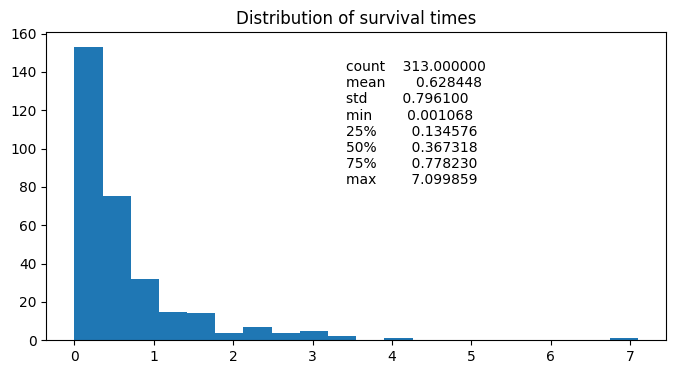

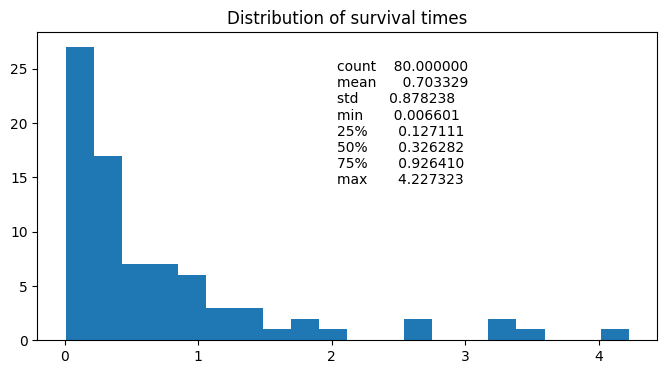

0.374
0.426


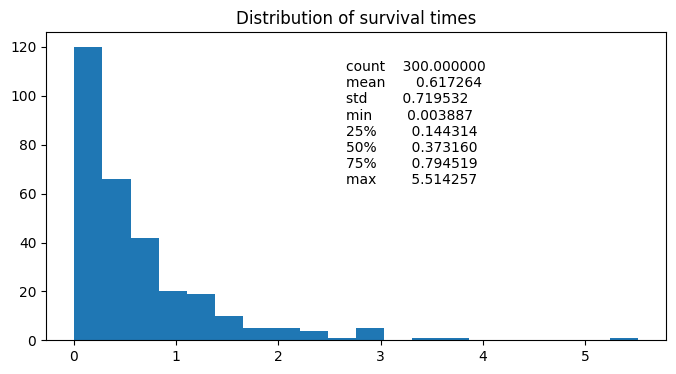

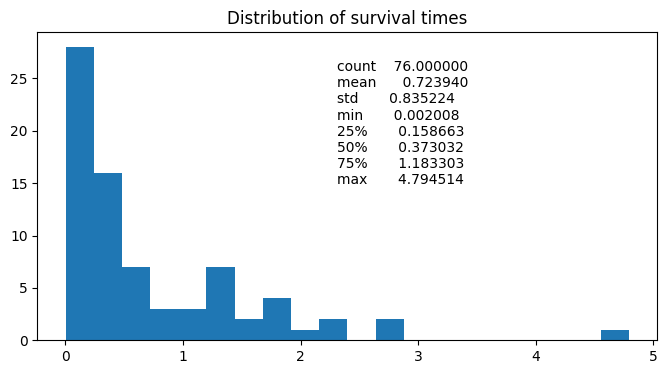

0.4
0.462


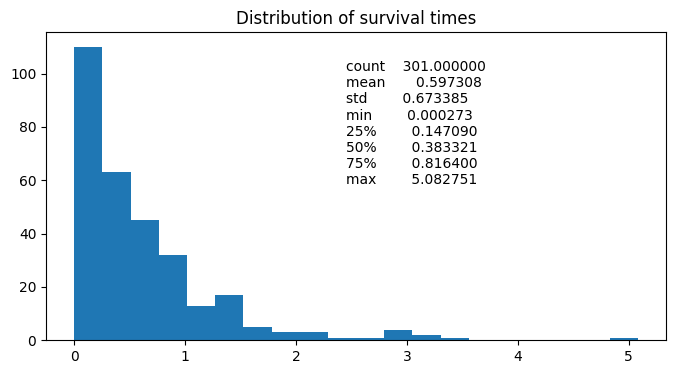

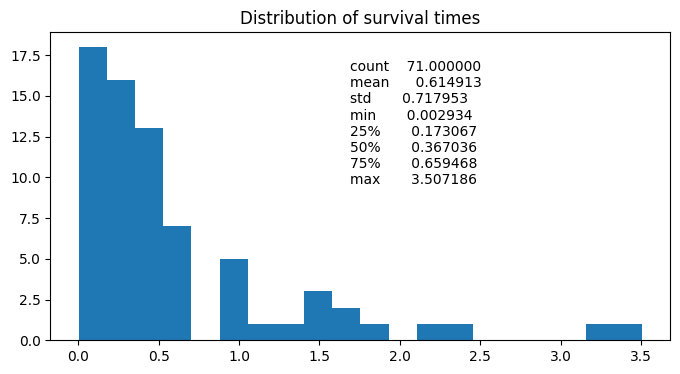

0.398
0.446


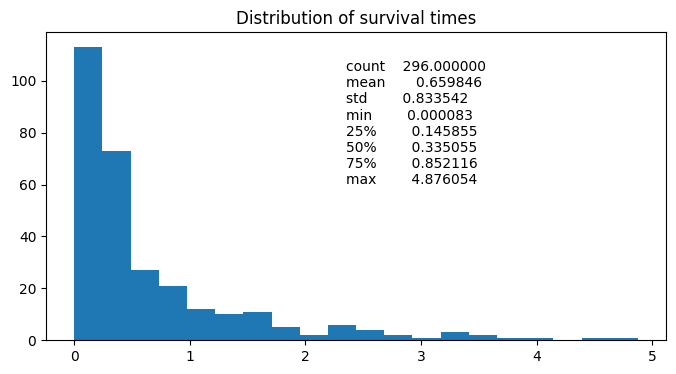

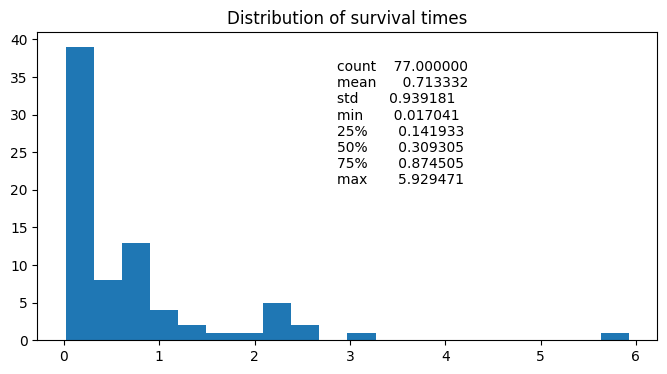

0.408
0.496


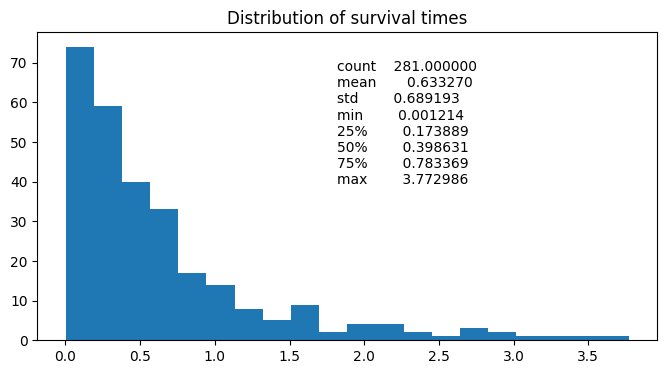

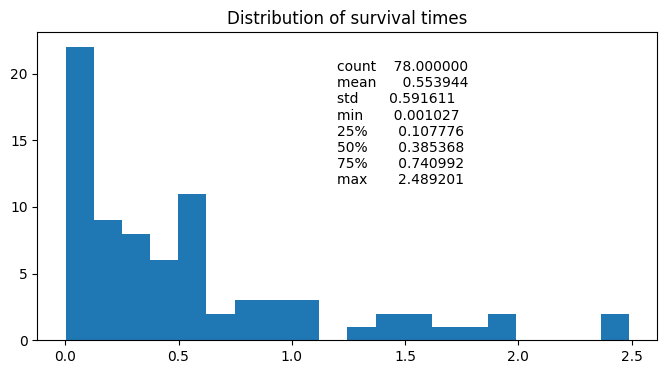

0.438
0.498


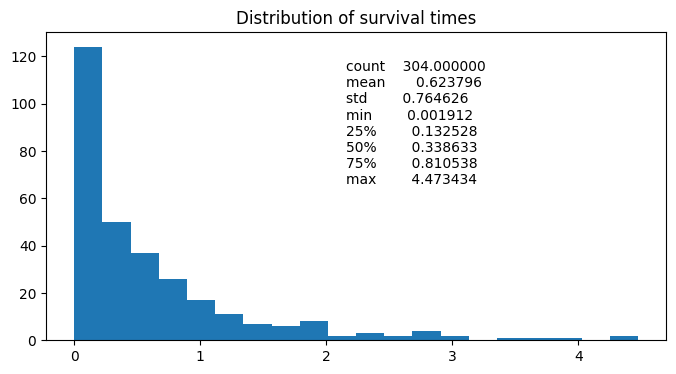

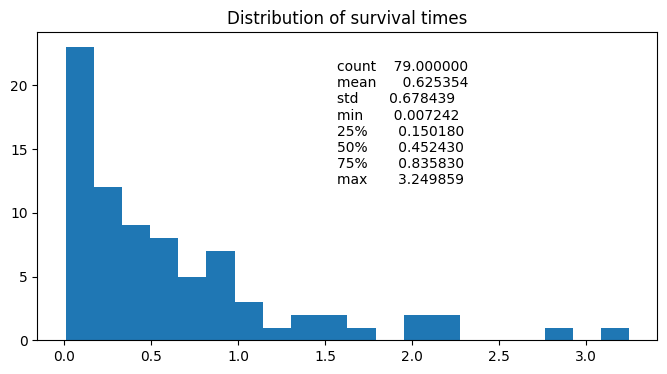

0.392
0.44


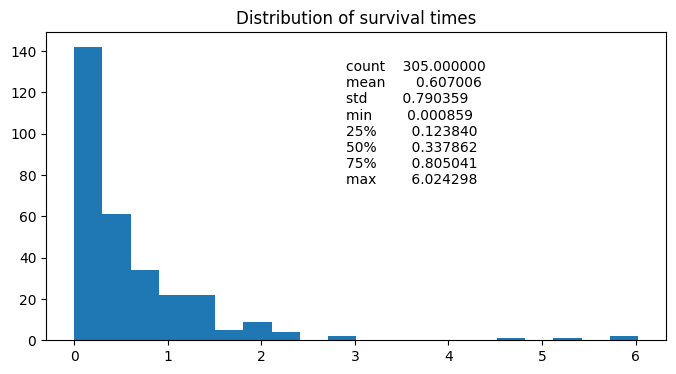

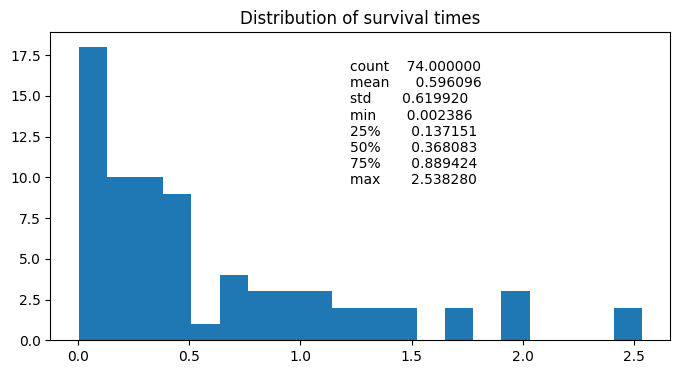

0.39
0.432


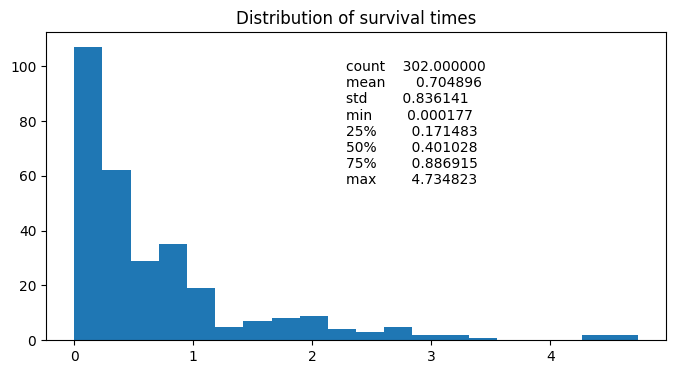

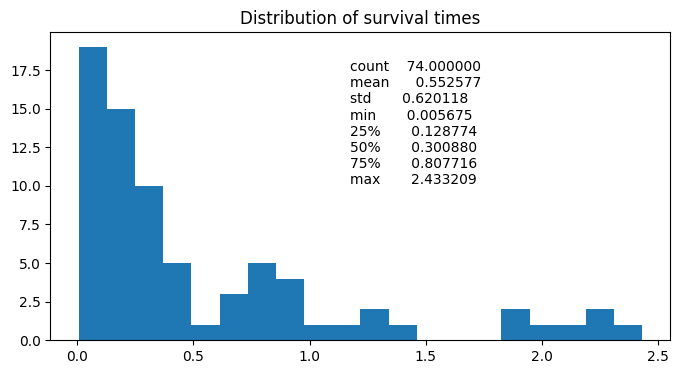

0.396
0.458


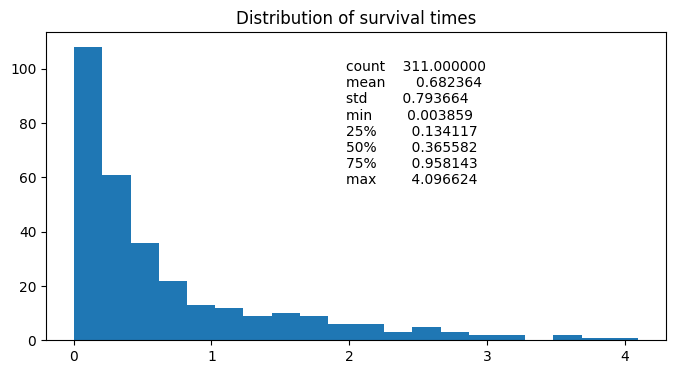

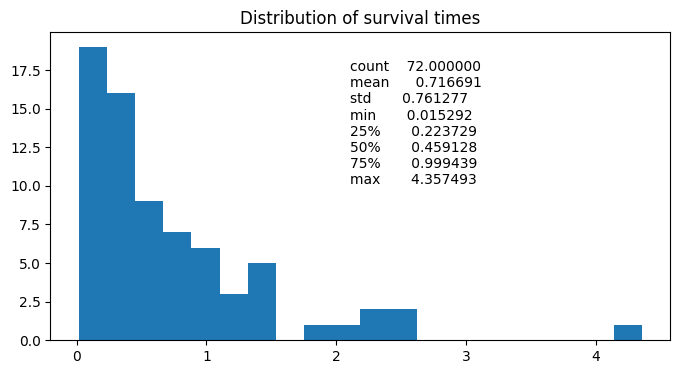

0.378
0.462


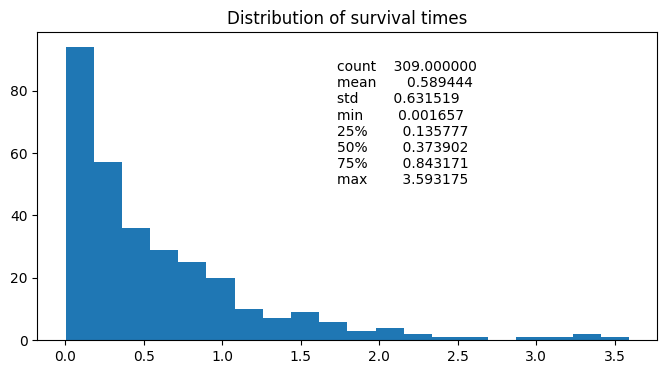

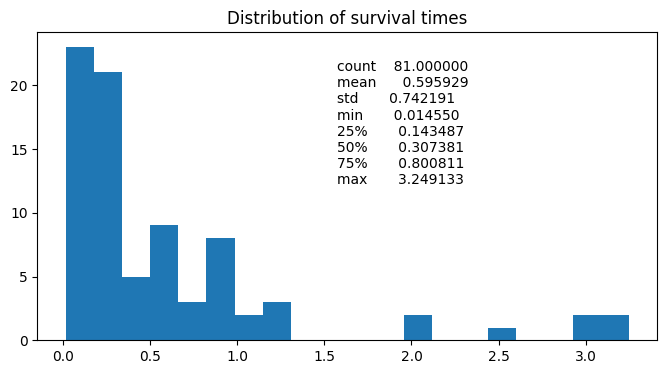

0.382
0.452


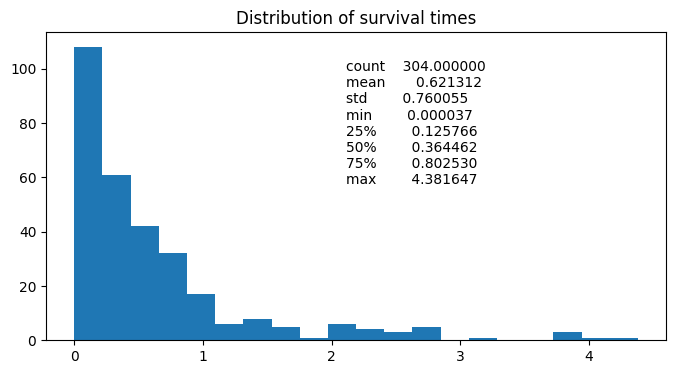

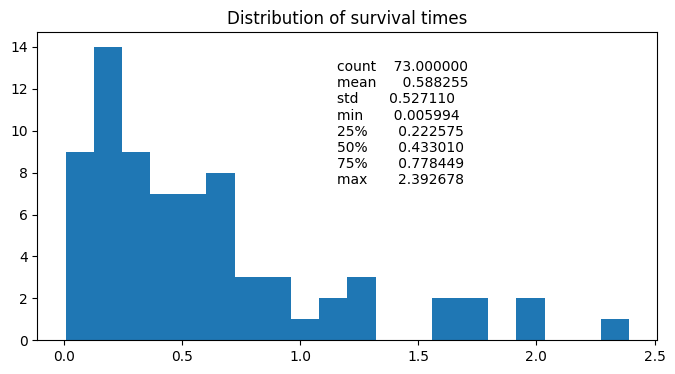

0.392
0.454


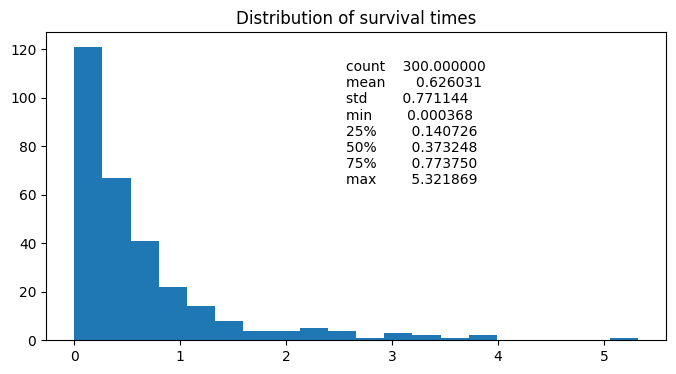

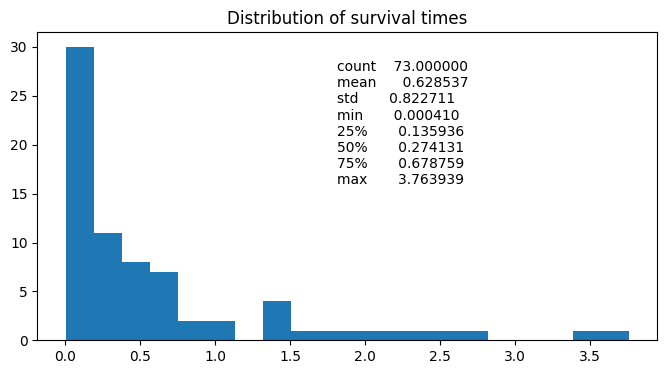

0.4
0.446


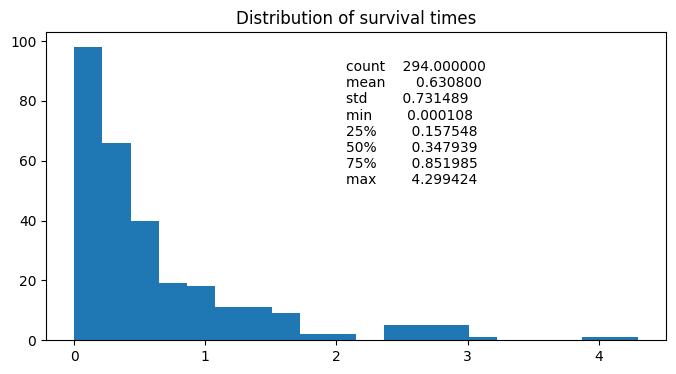

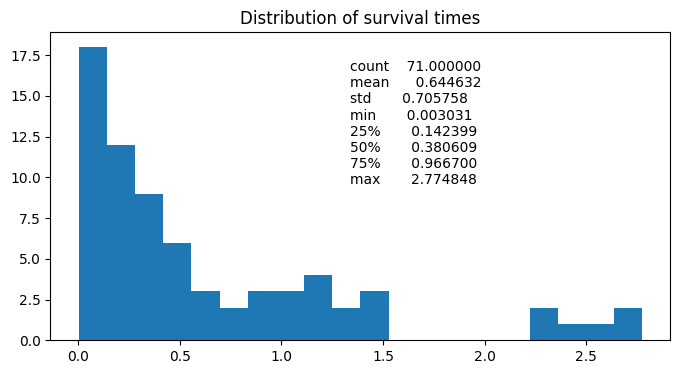

0.412
0.482


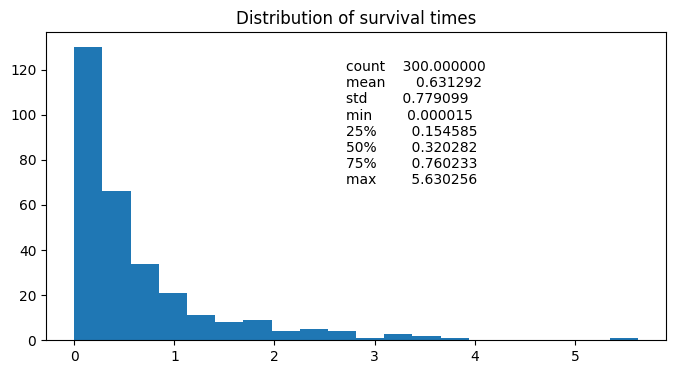

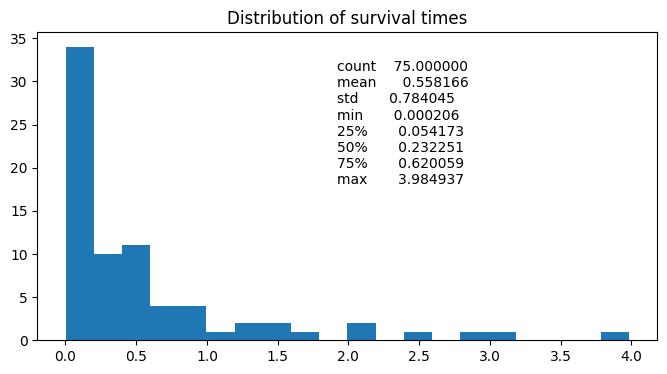

0.4
0.466


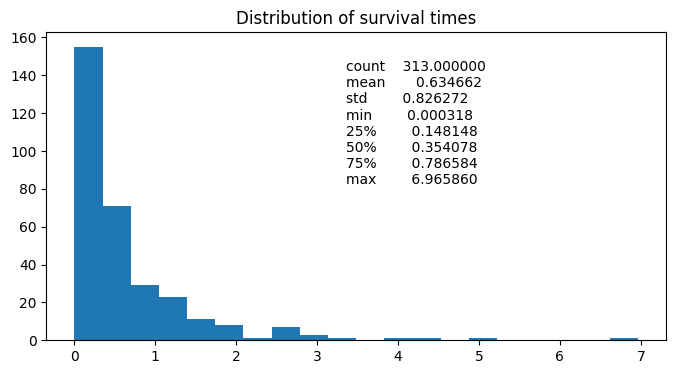

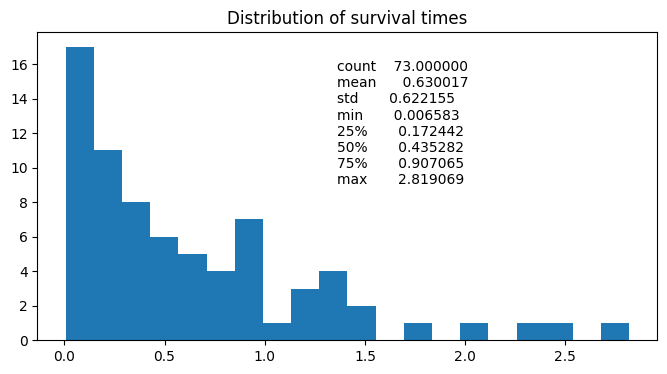

0.374
0.42


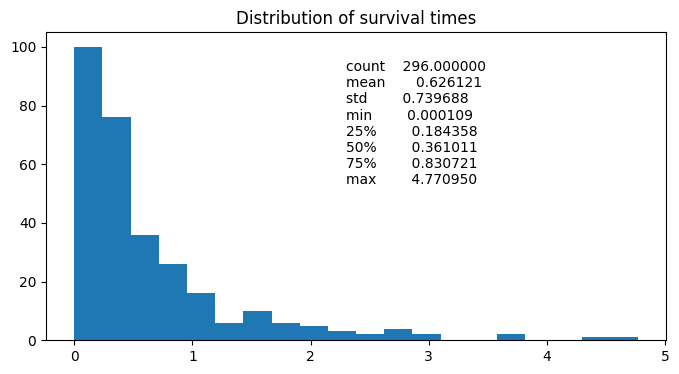

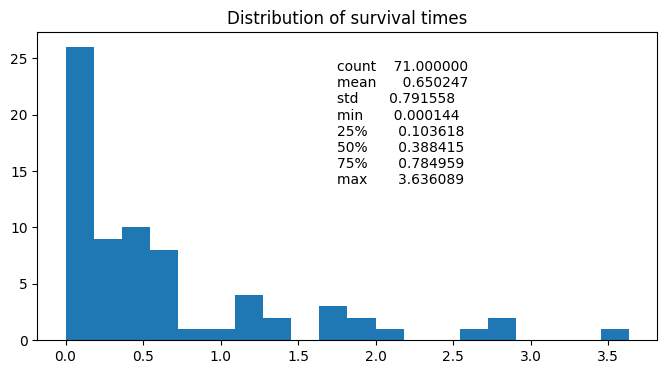

0.408
0.484


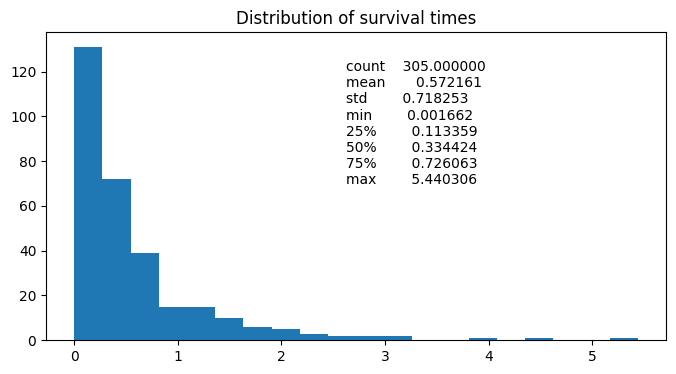

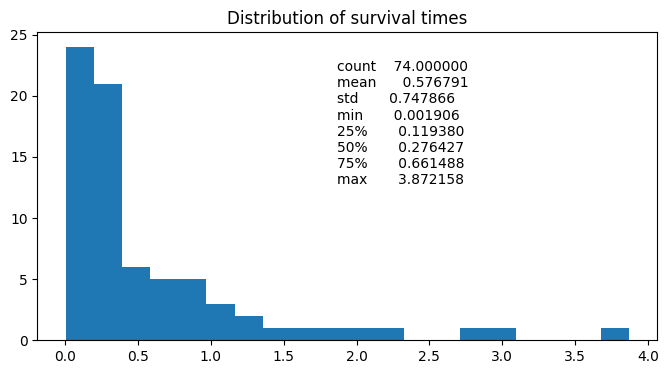

0.39
0.446


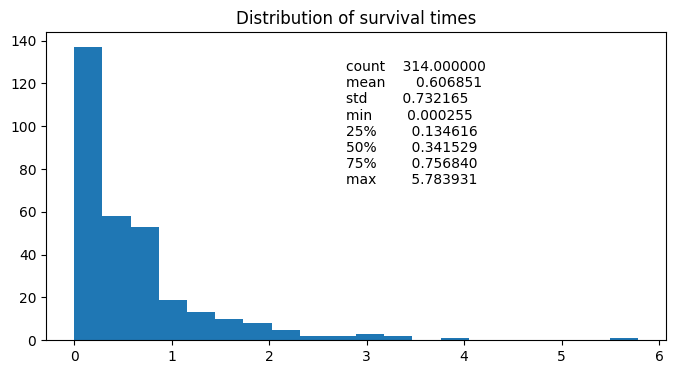

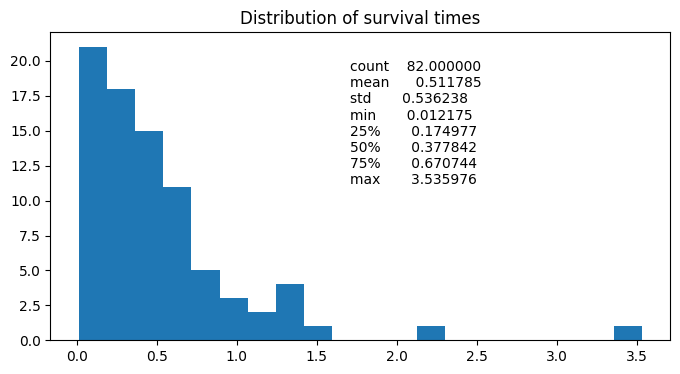

0.372
0.428


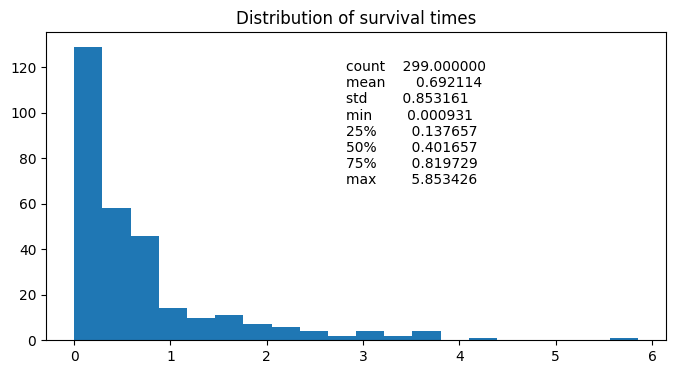

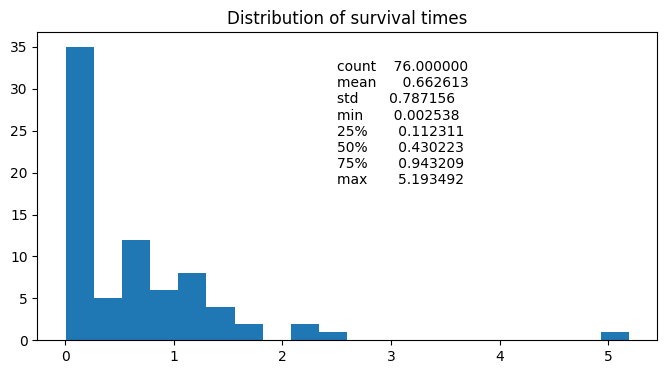

0.402
0.488


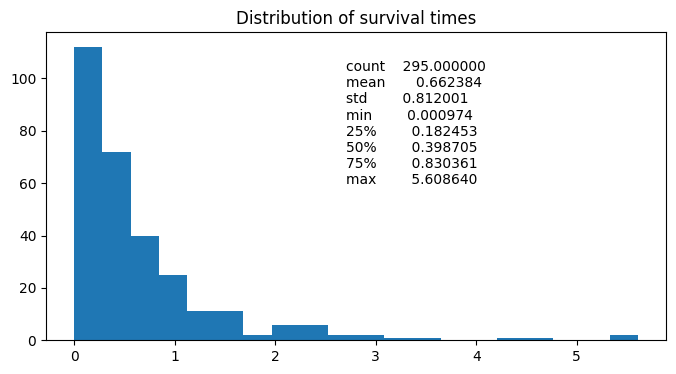

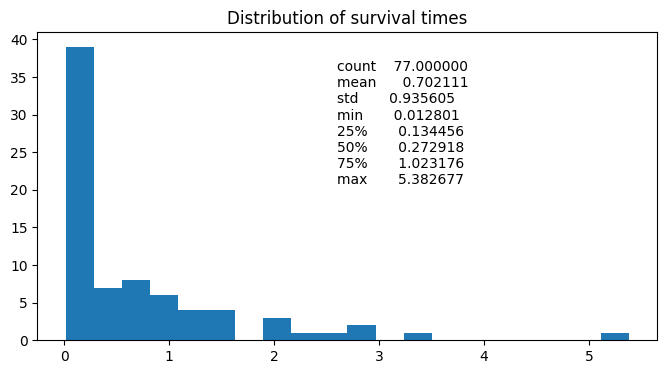

0.41
0.468


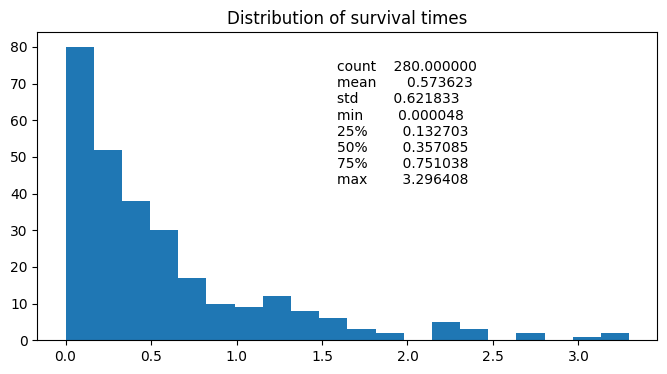

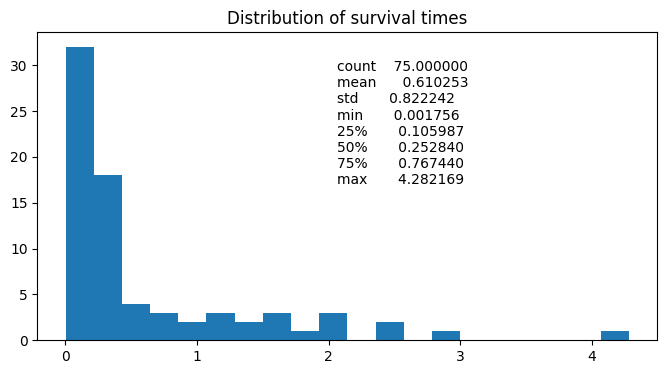

0.44
0.526


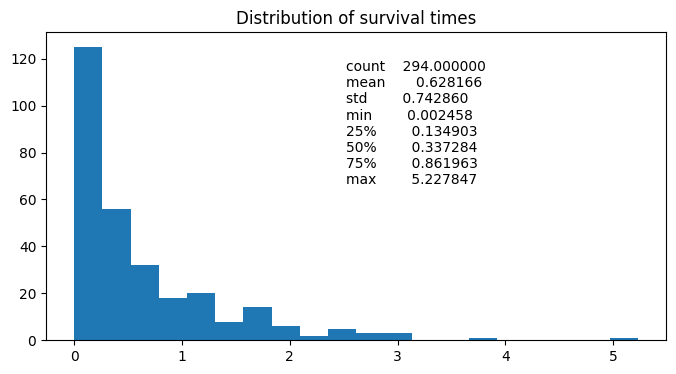

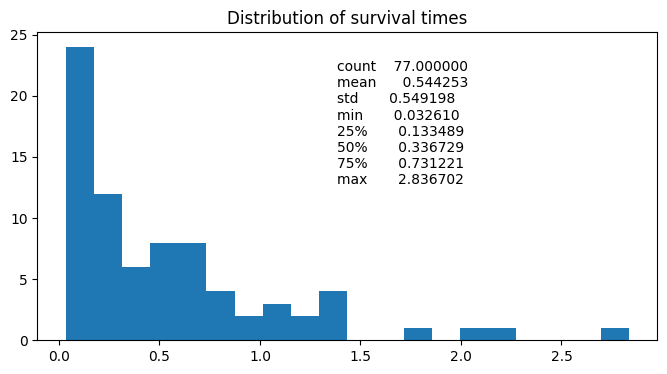

0.412
0.472


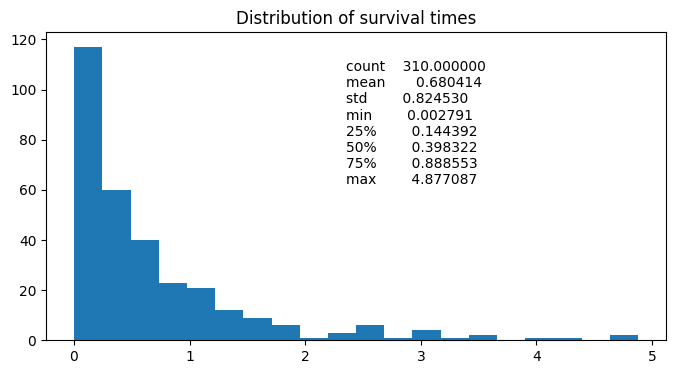

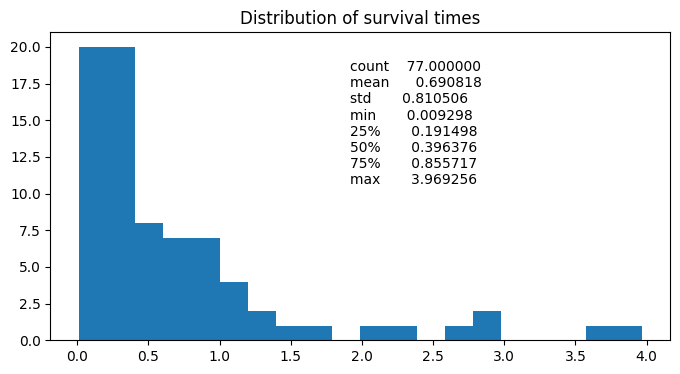

0.38
0.474


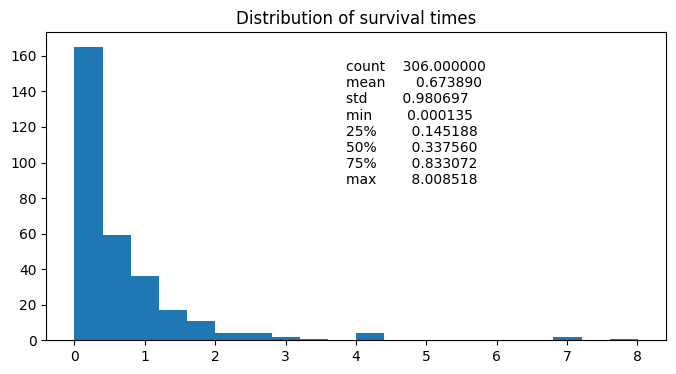

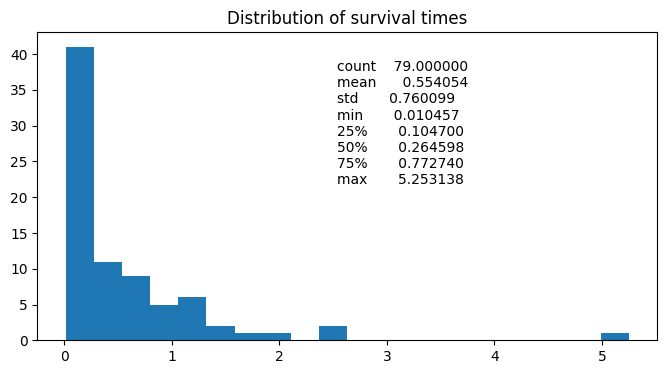

0.388
0.424


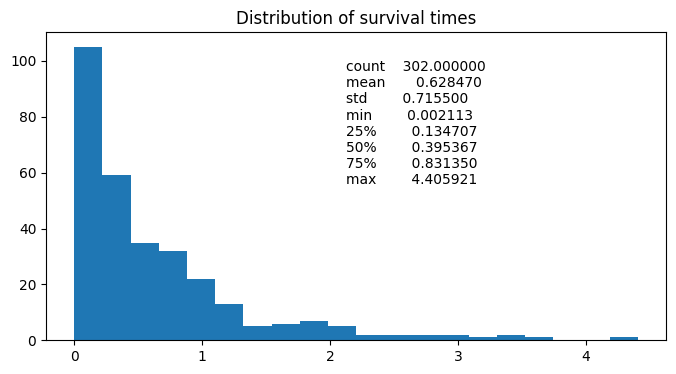

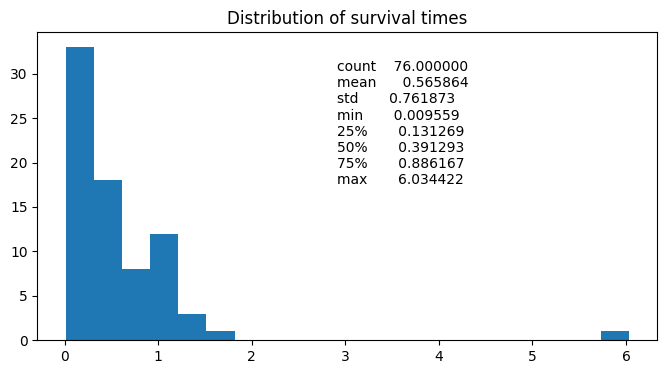

0.396
0.458


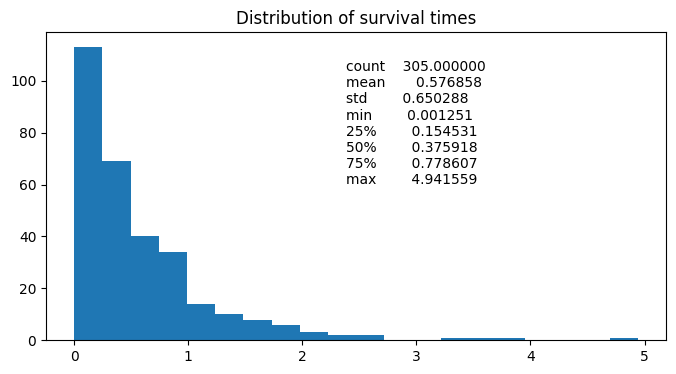

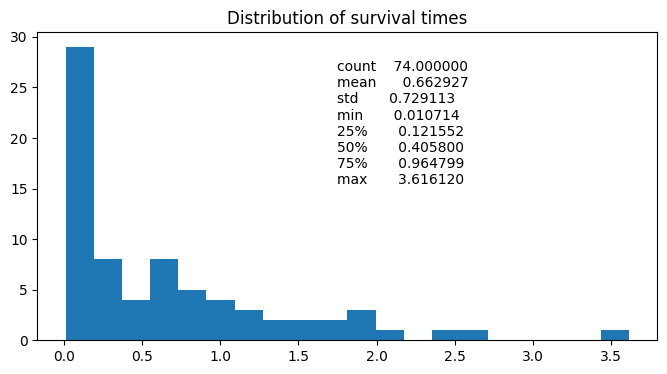

0.39
0.45


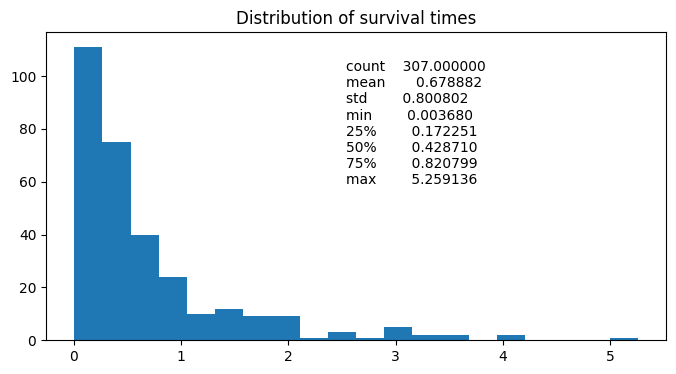

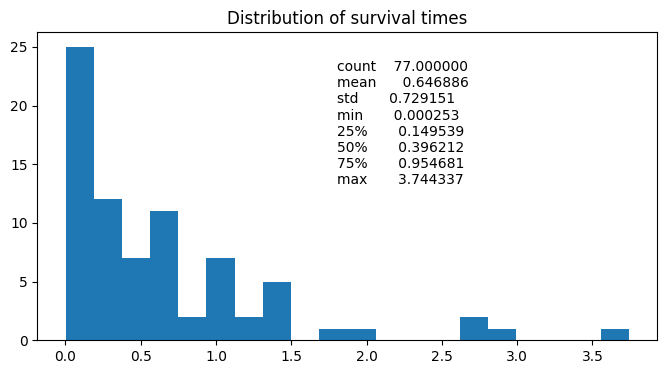

0.386
0.432


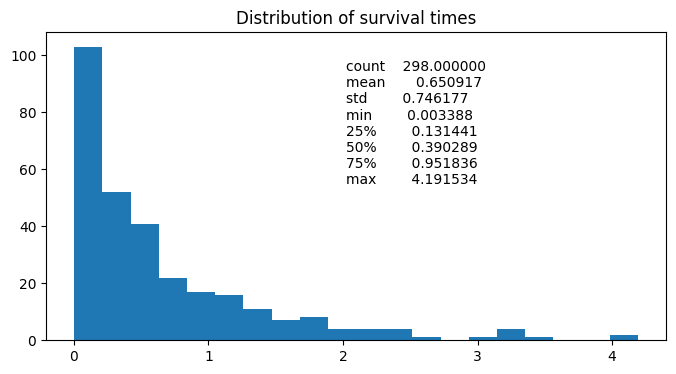

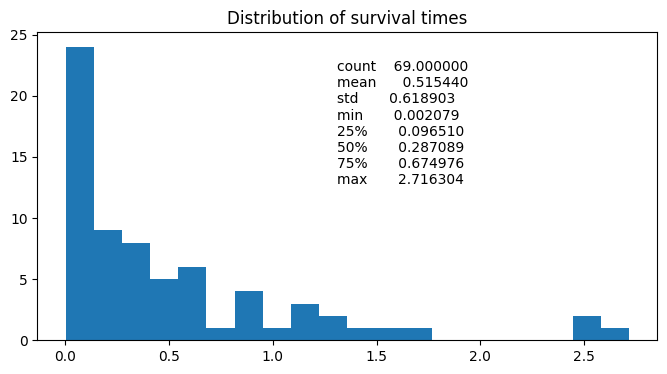

0.404
0.472


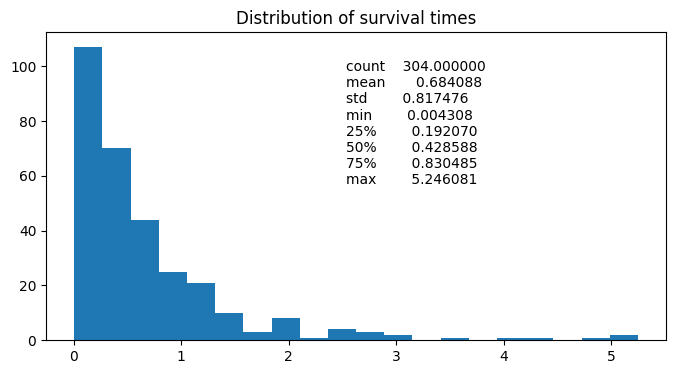

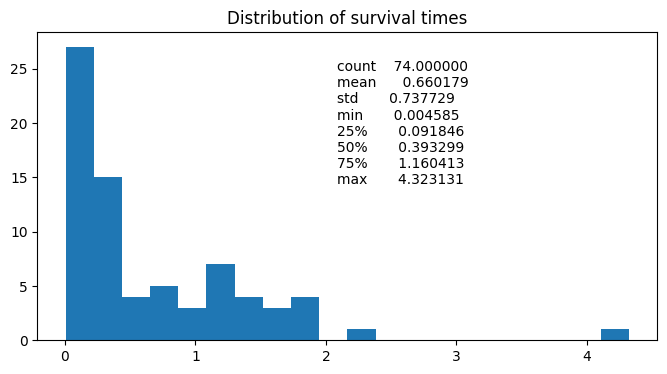

0.392
0.44


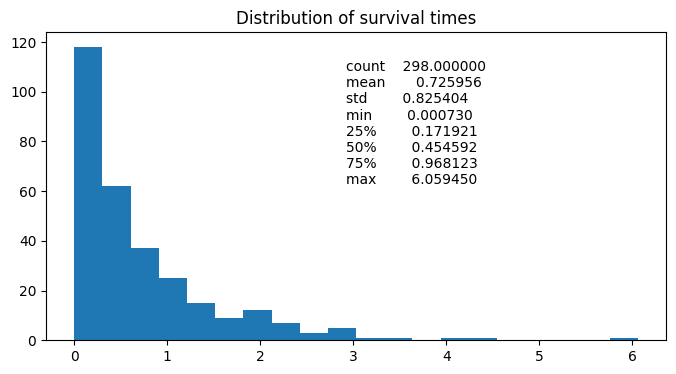

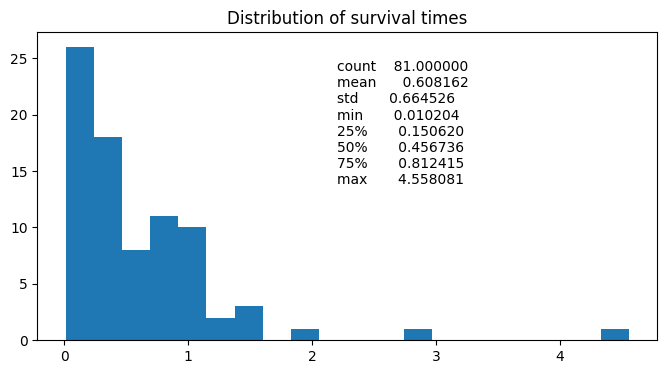

0.404
0.472


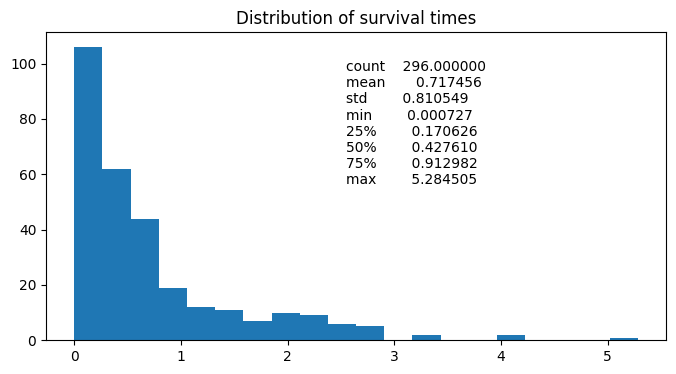

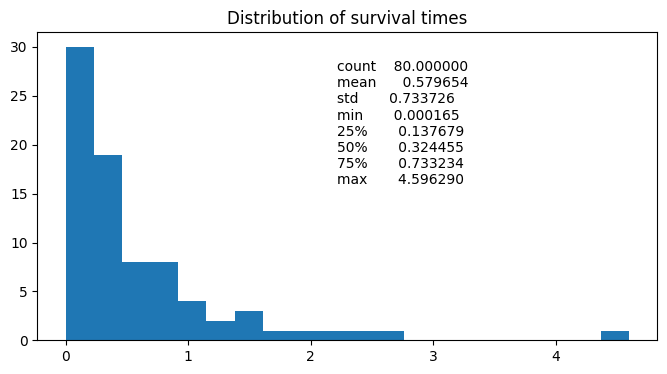

0.408
0.452


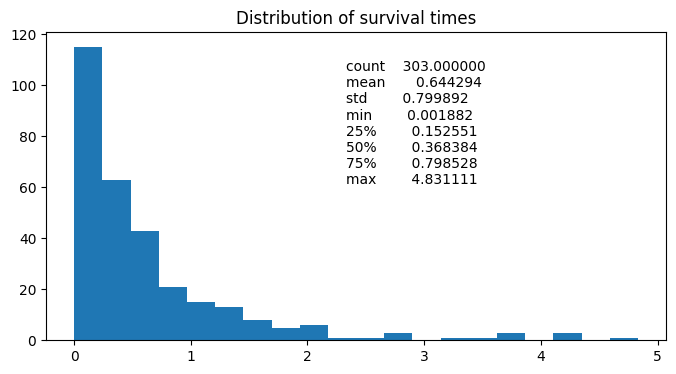

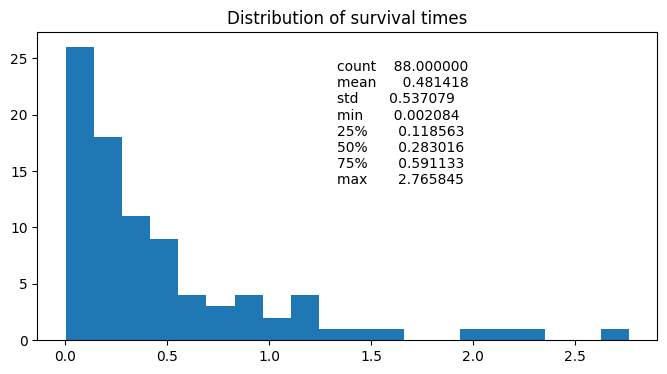

0.394
0.44


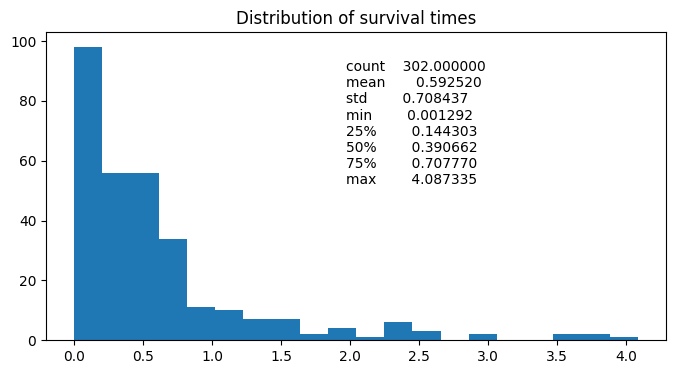

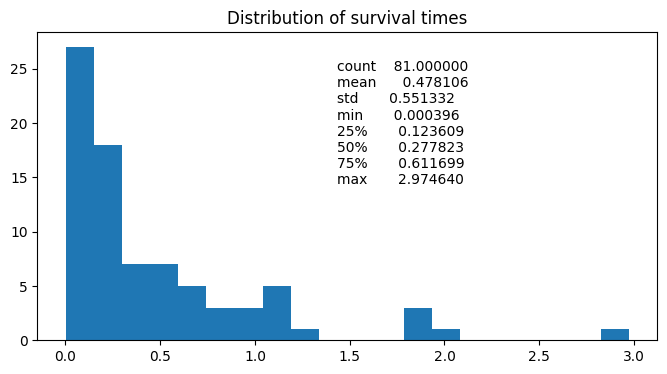

0.396
0.45


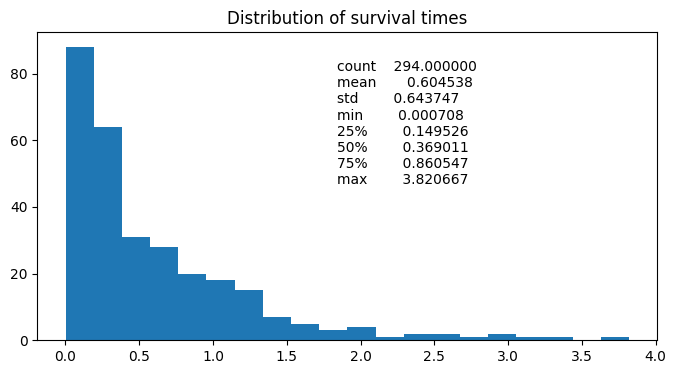

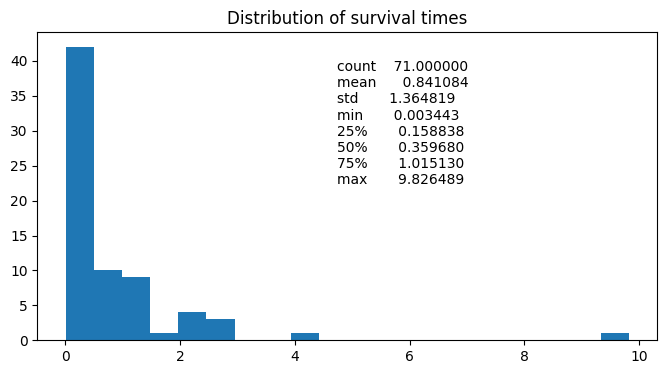

0.412
0.484


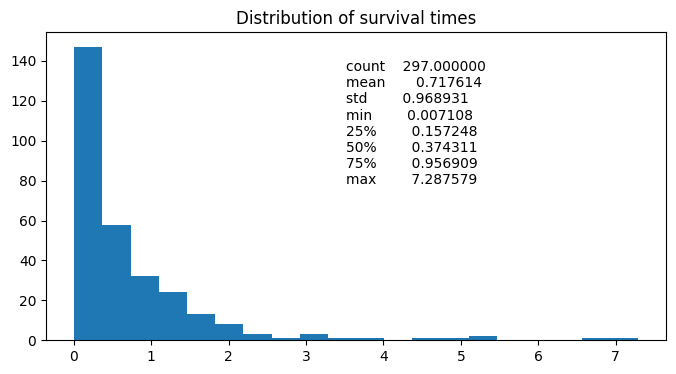

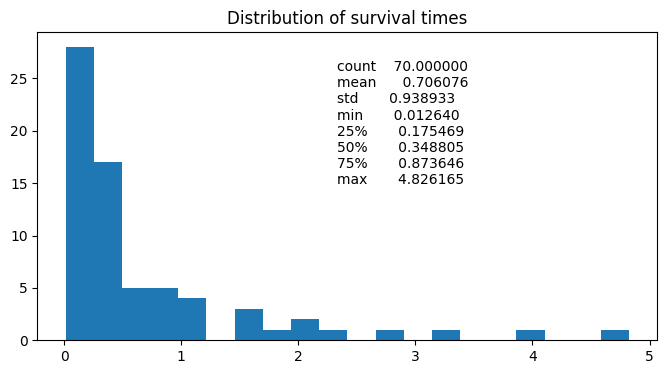

0.406
0.46


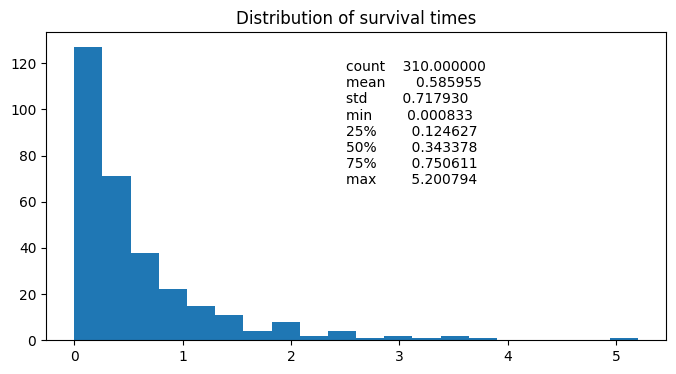

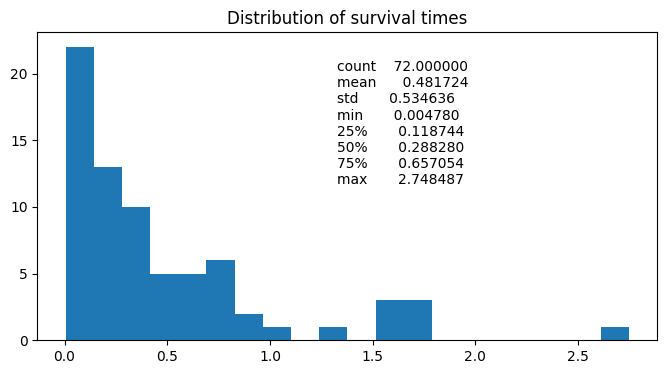

0.38
0.446


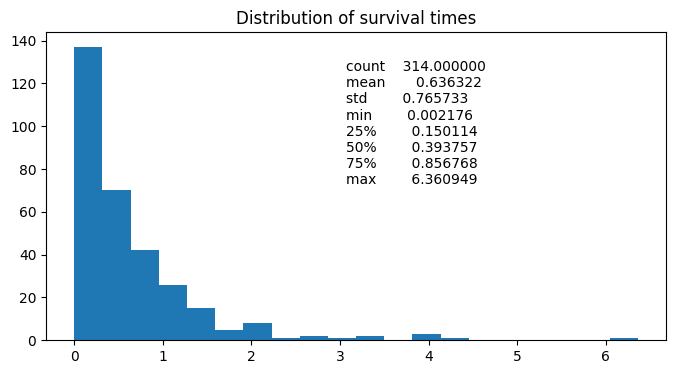

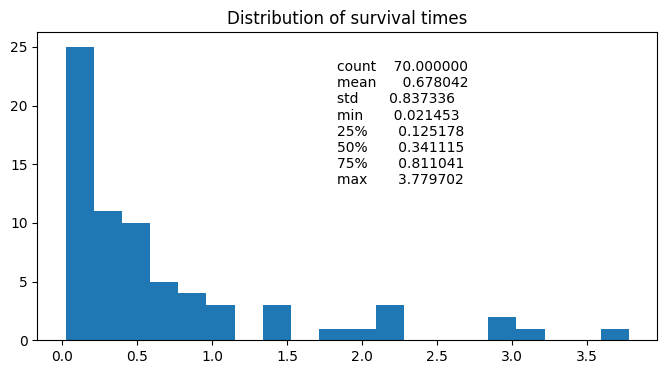

0.372
0.426


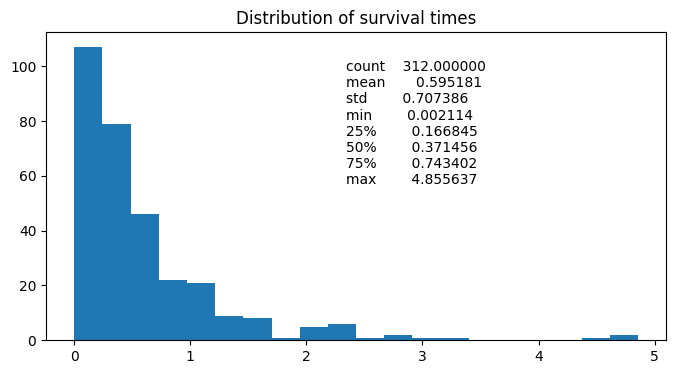

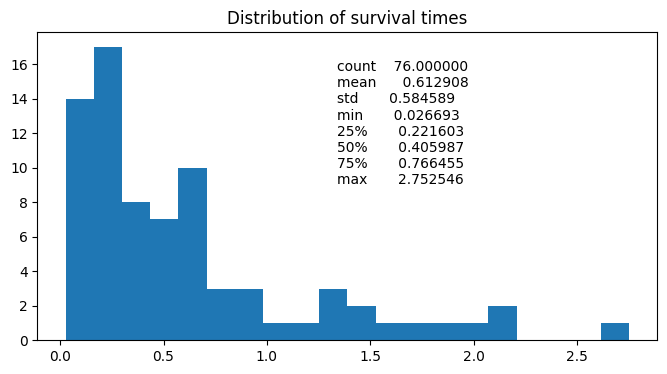

0.376
0.446


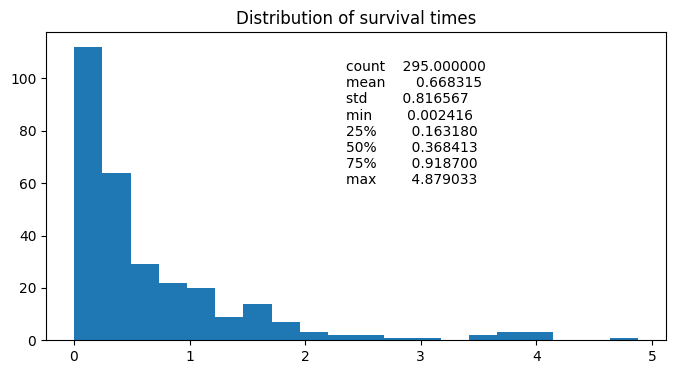

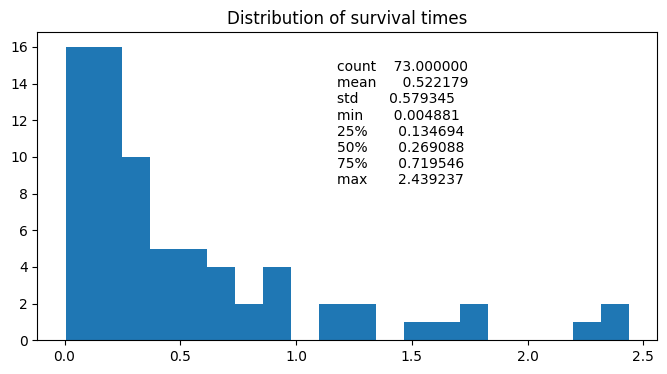

0.41
0.482


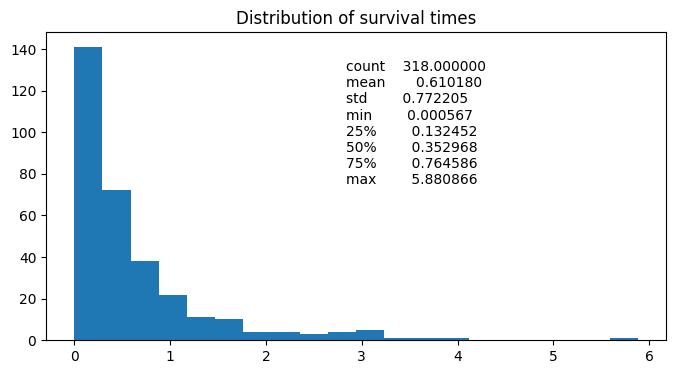

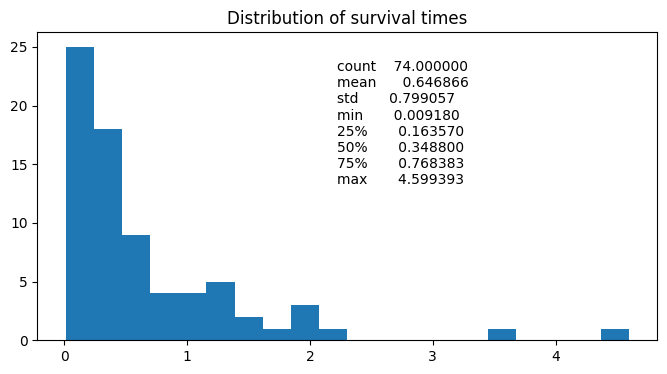

0.364
0.426


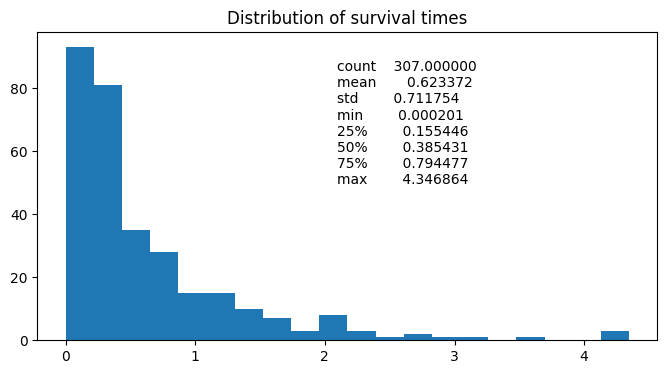

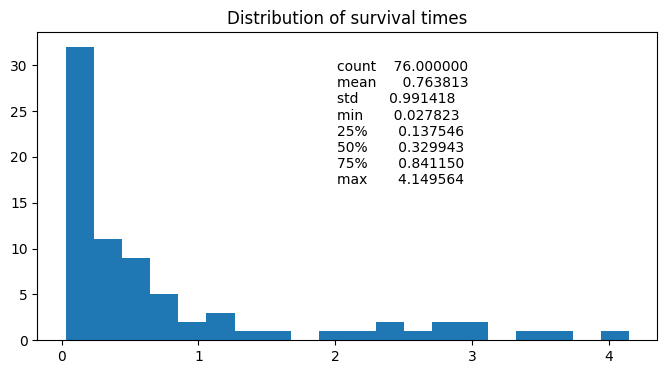

0.386
0.446


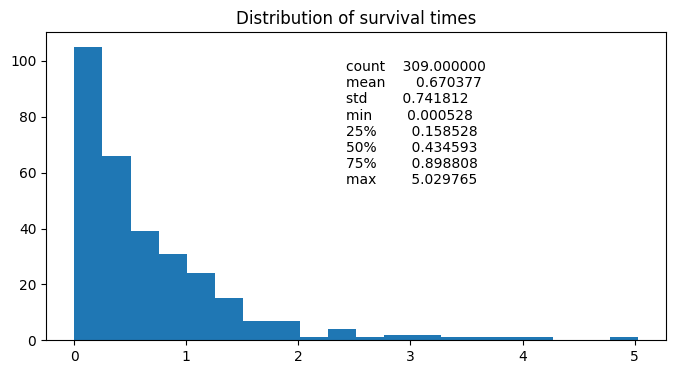

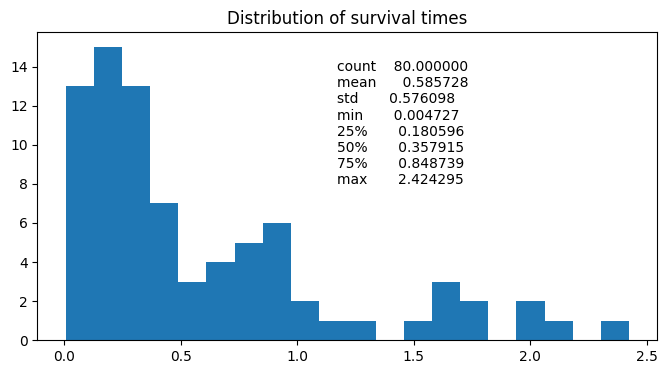

0.382
0.438


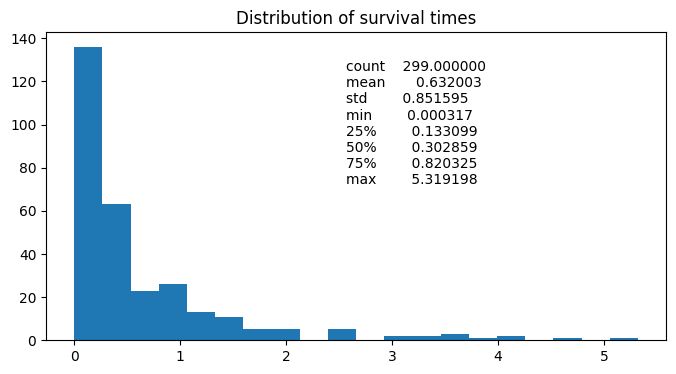

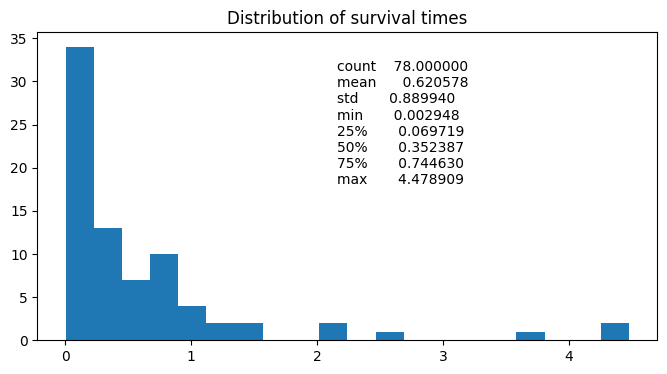

0.402
0.456


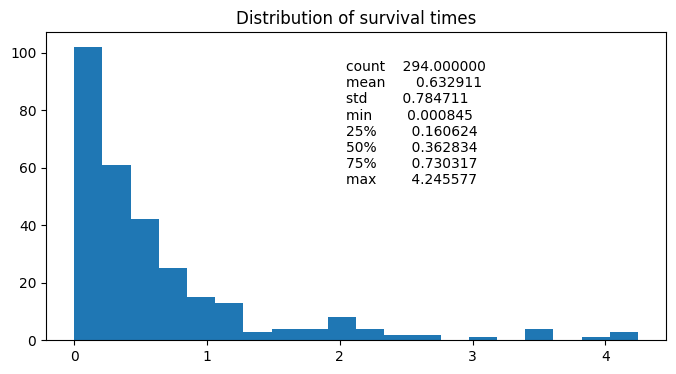

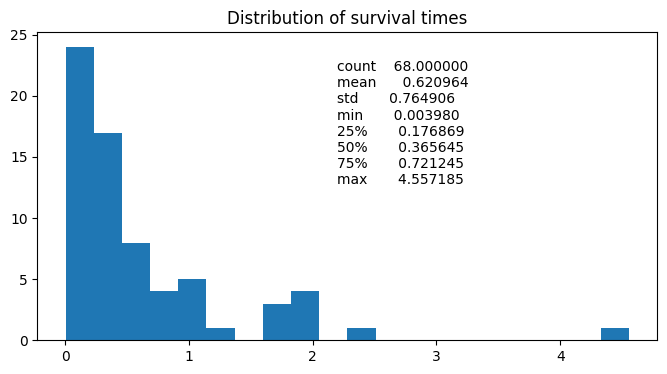

0.412
0.484


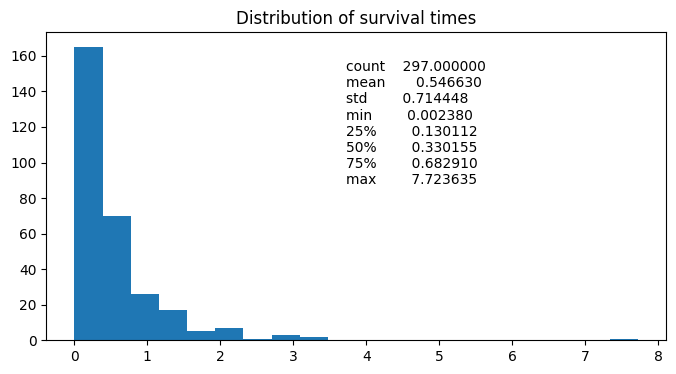

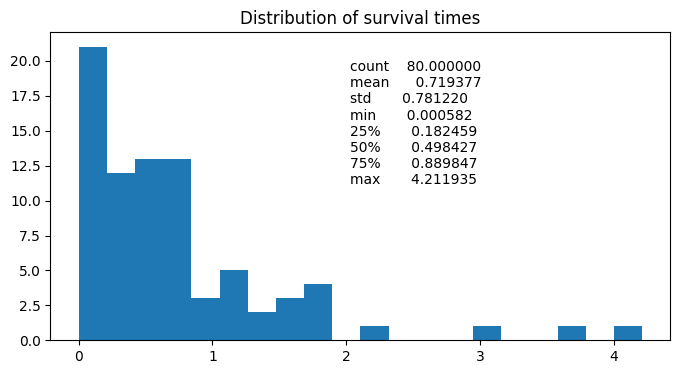

0.406
0.444


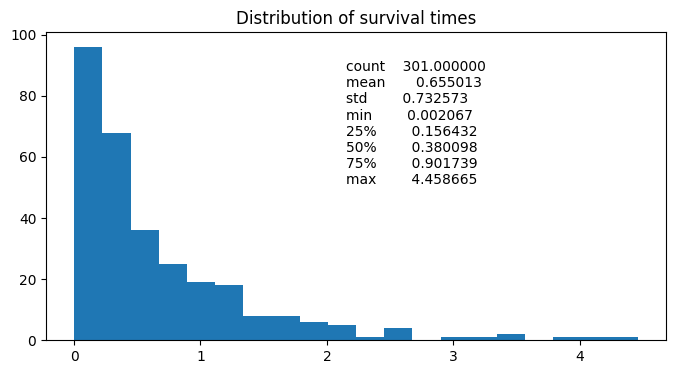

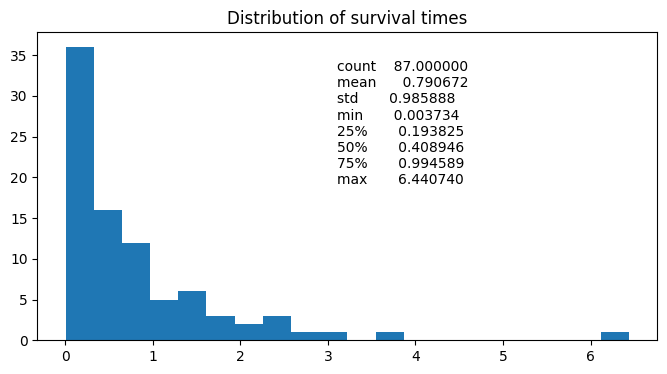

0.398
0.474


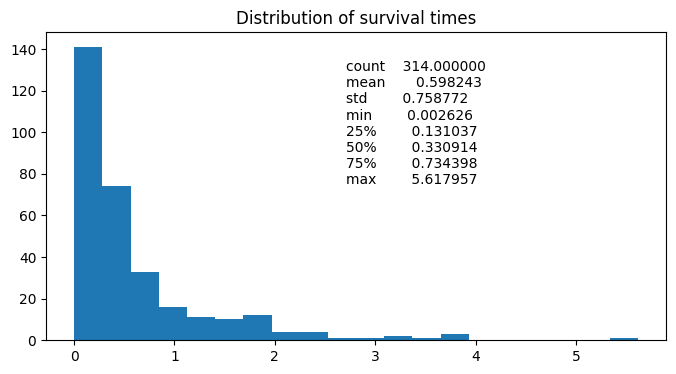

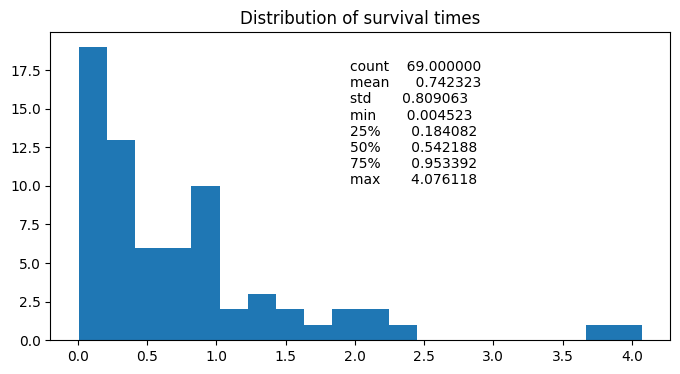

0.372
0.43


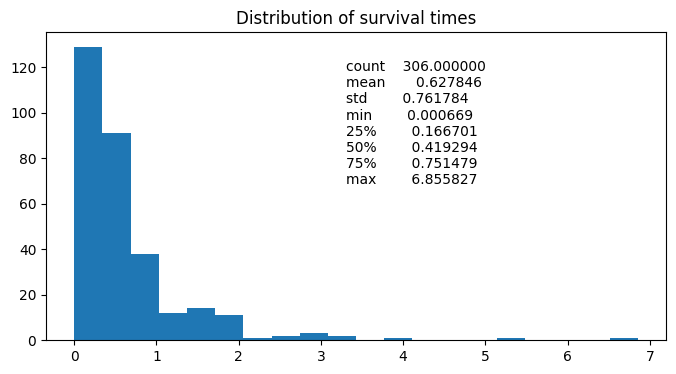

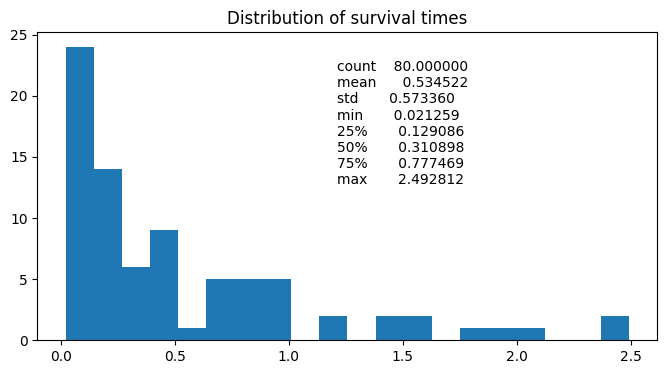

0.388
0.424


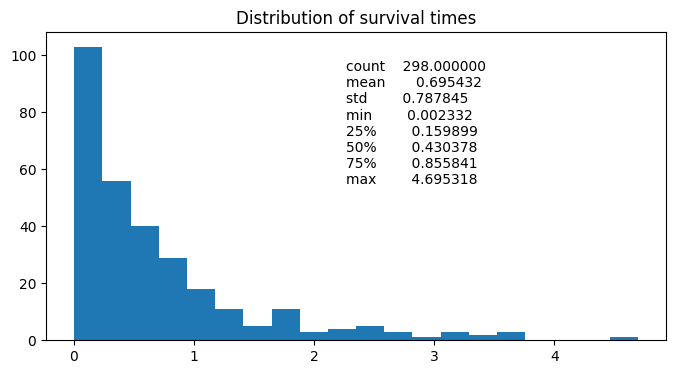

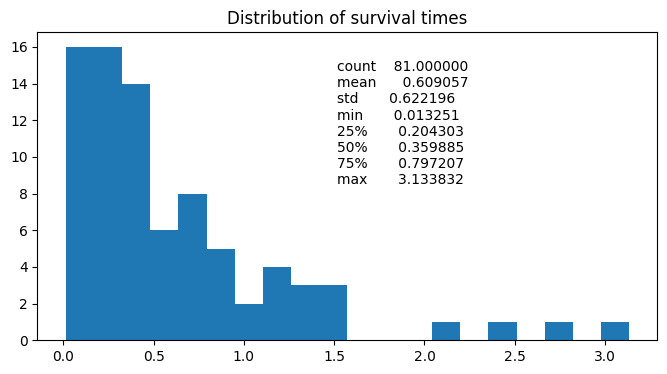

0.404
0.494


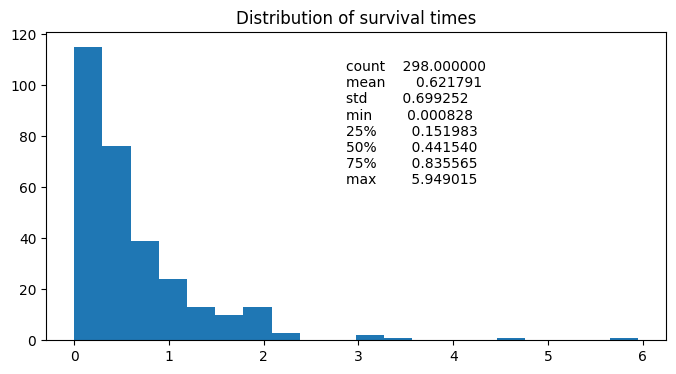

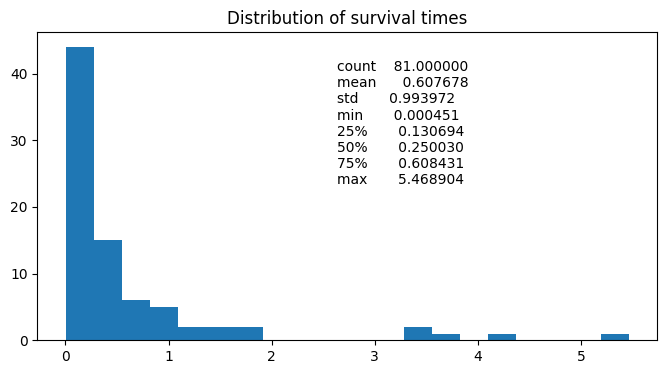

0.404
0.472


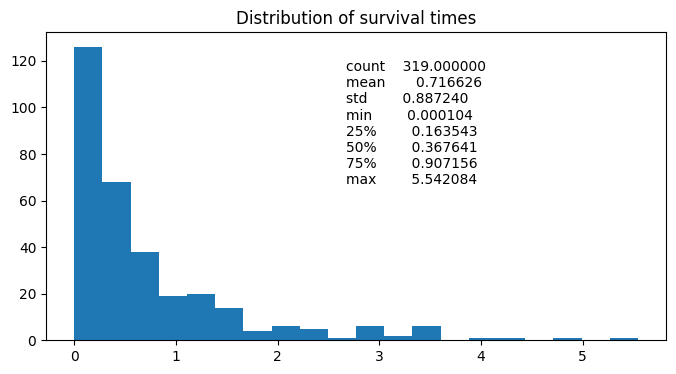

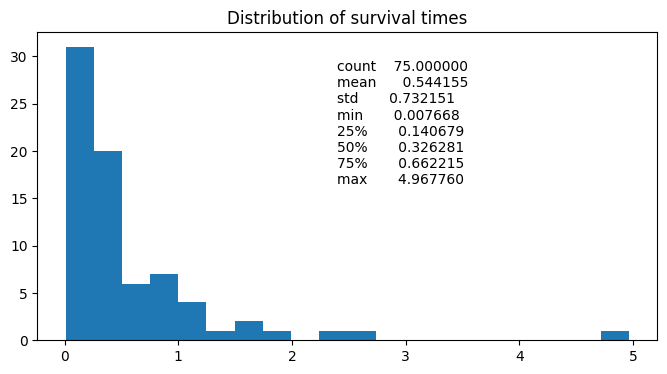

0.362
0.436


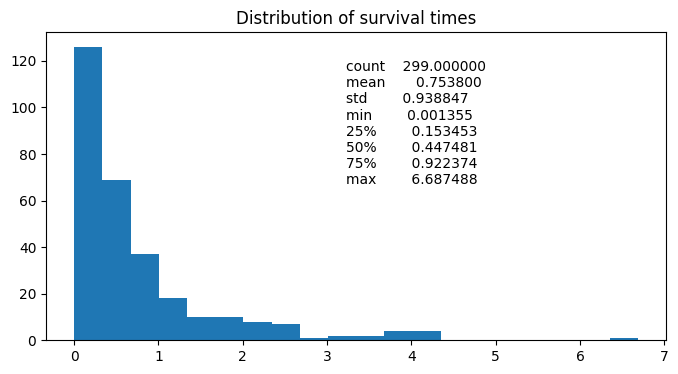

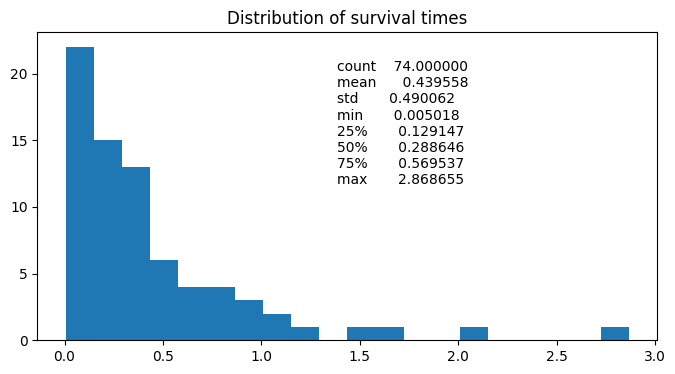

0.402
0.47


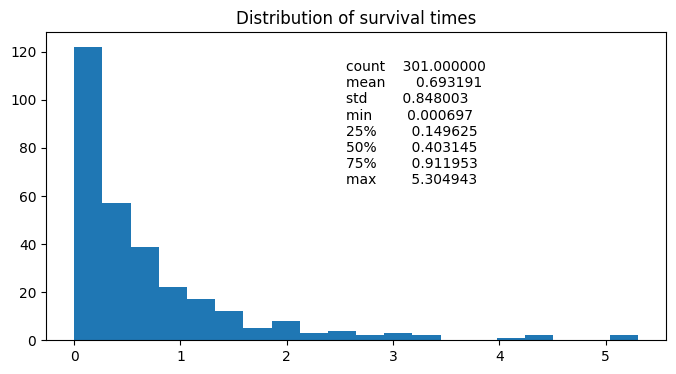

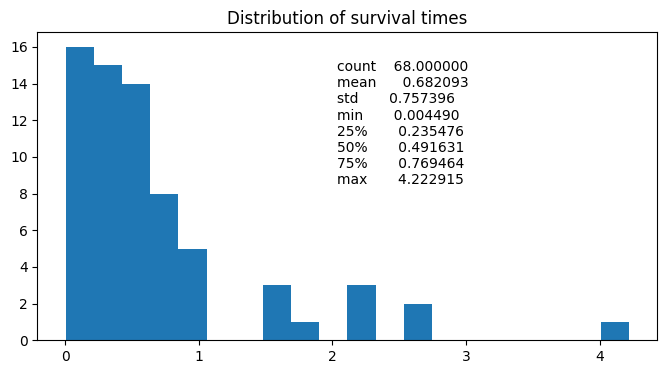

0.398
0.464


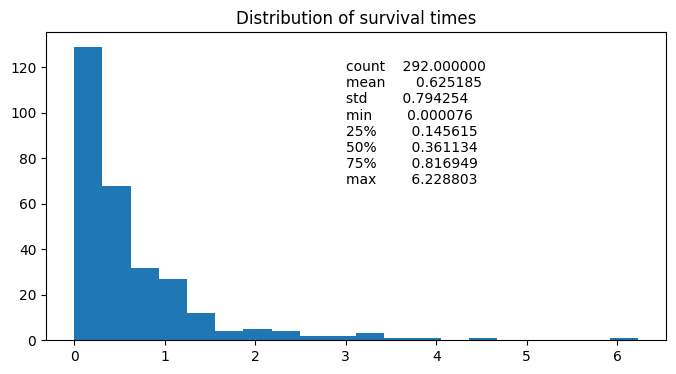

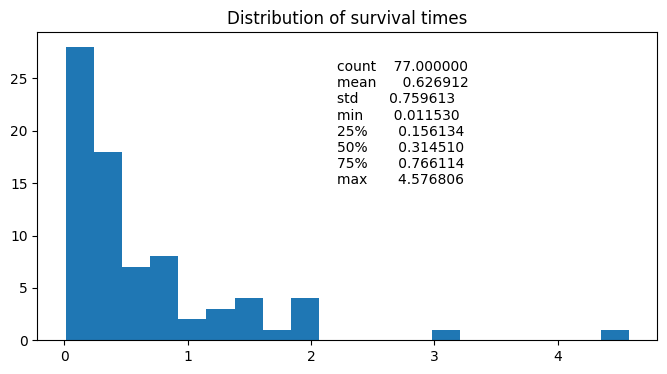

0.416
0.47


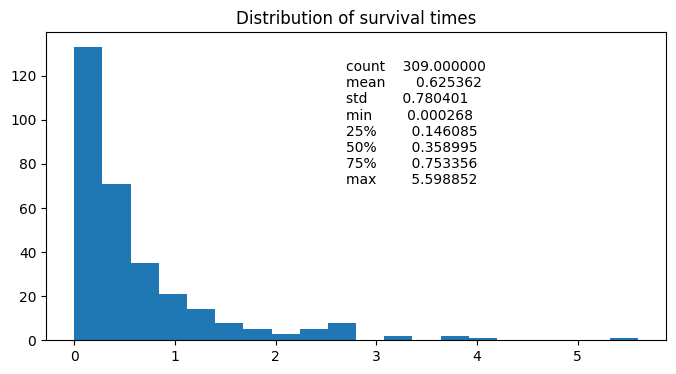

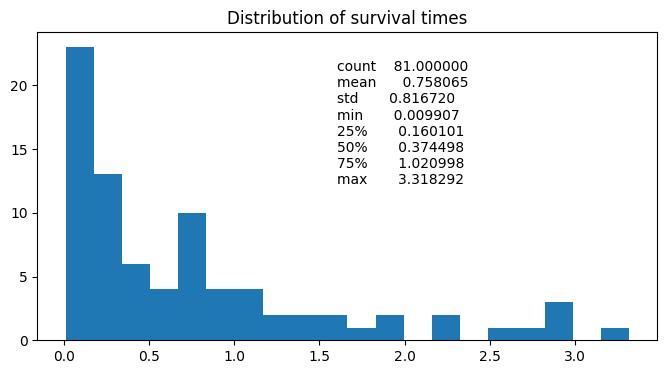

0.382
0.442


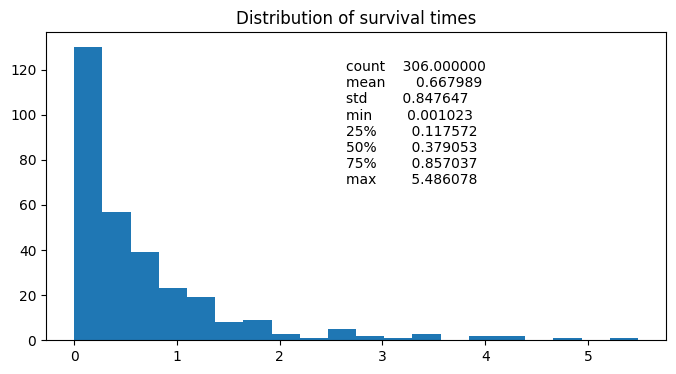

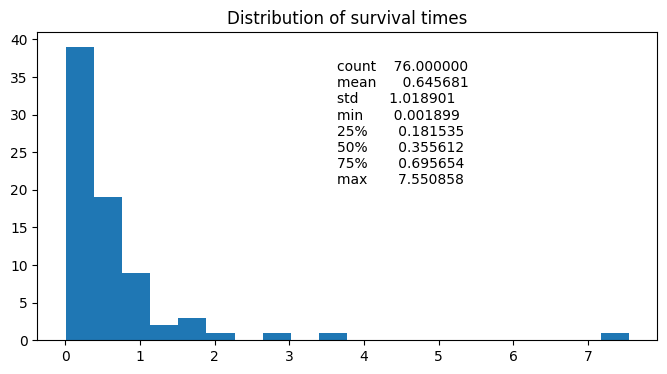

0.388
0.448


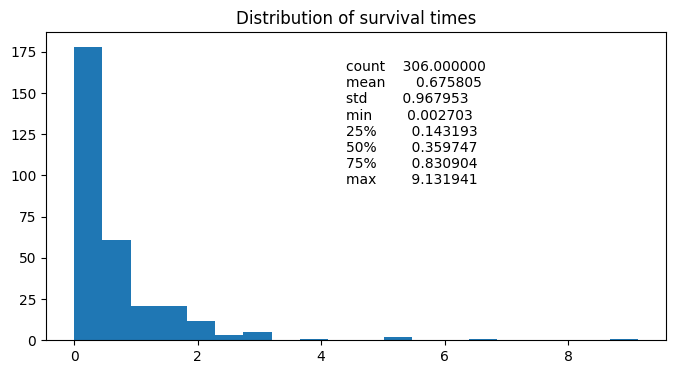

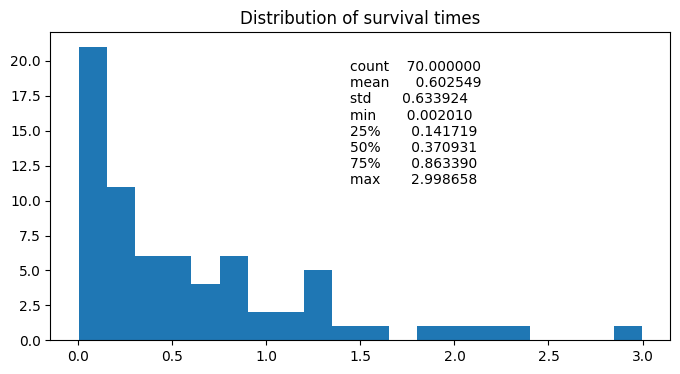

0.388
0.436


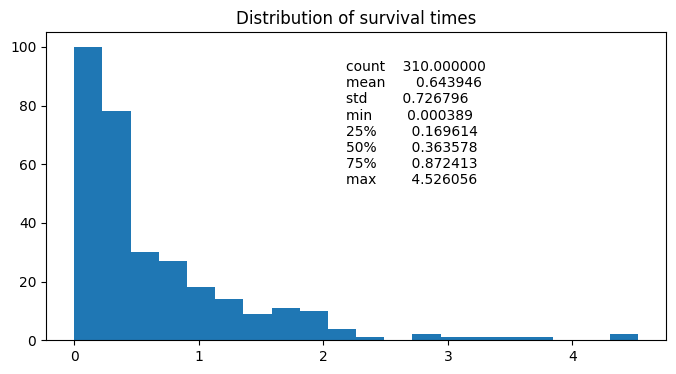

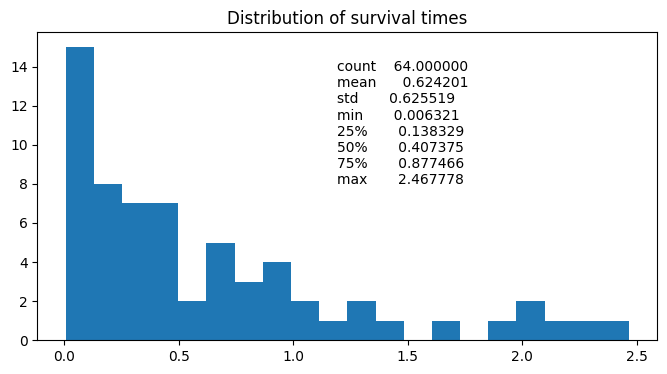

0.38
0.46


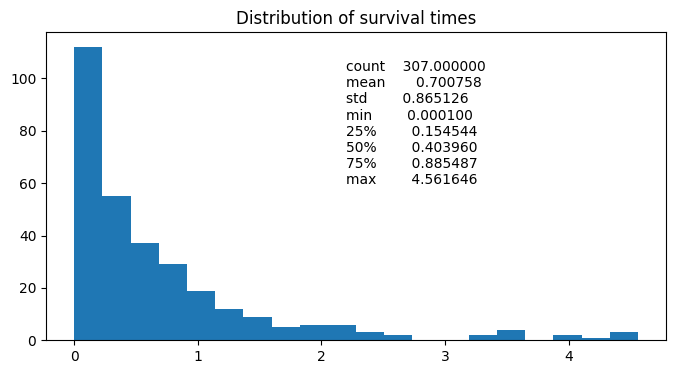

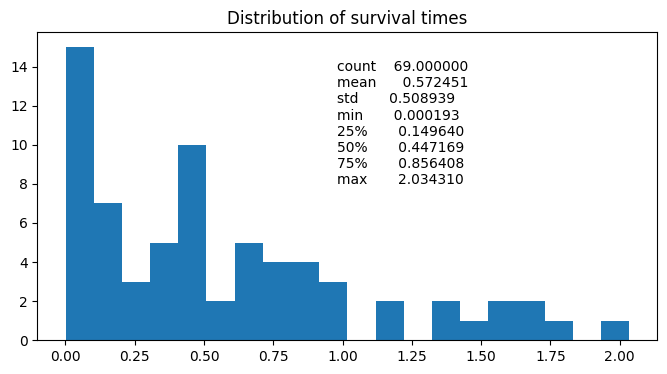

0.386
0.46


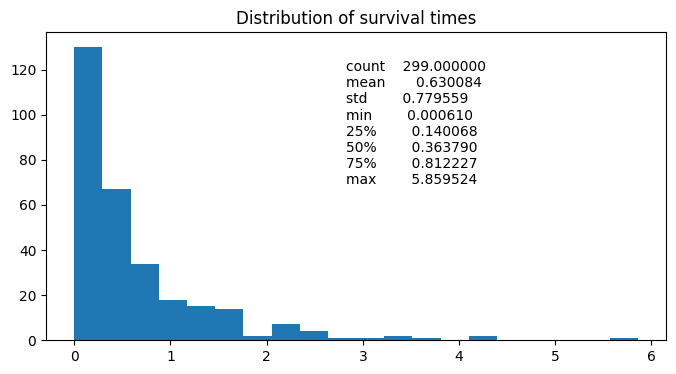

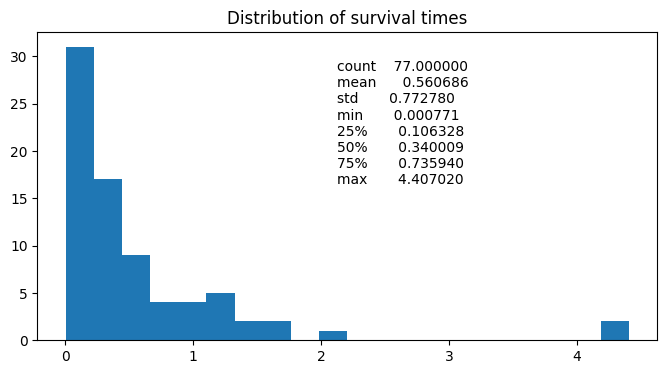

0.402
0.446


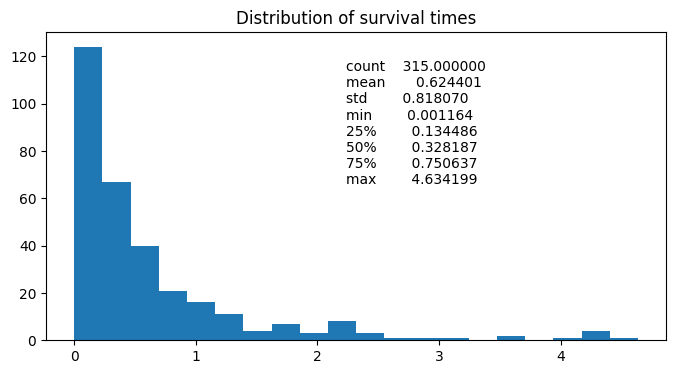

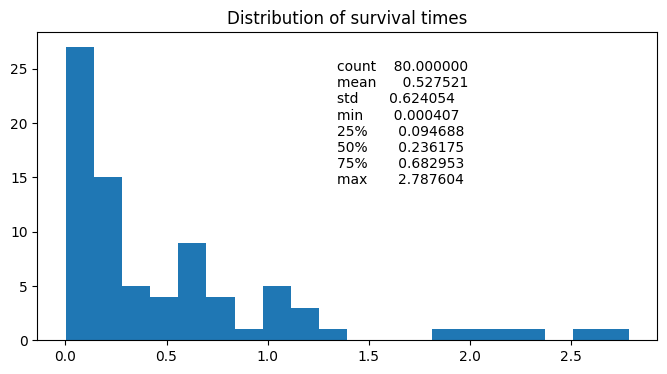

0.37
0.442


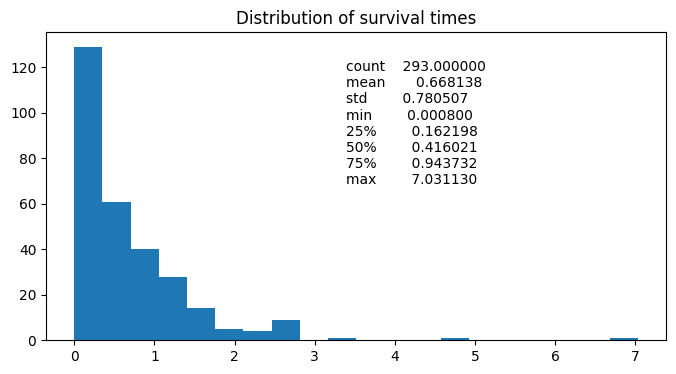

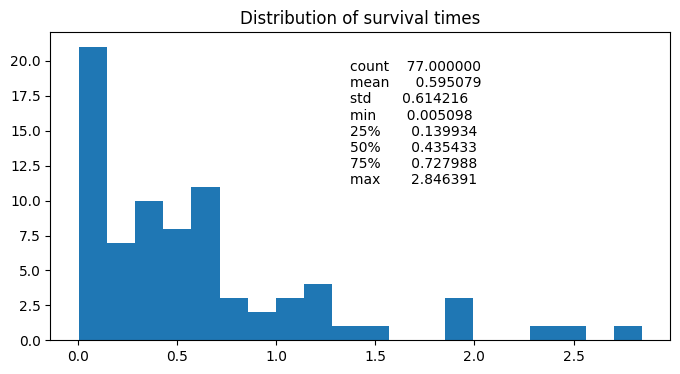

0.414
0.448


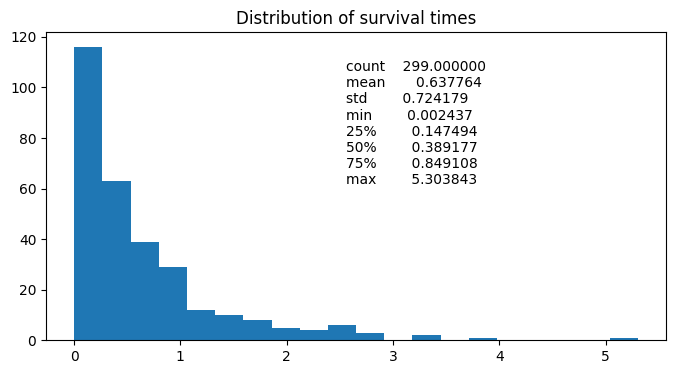

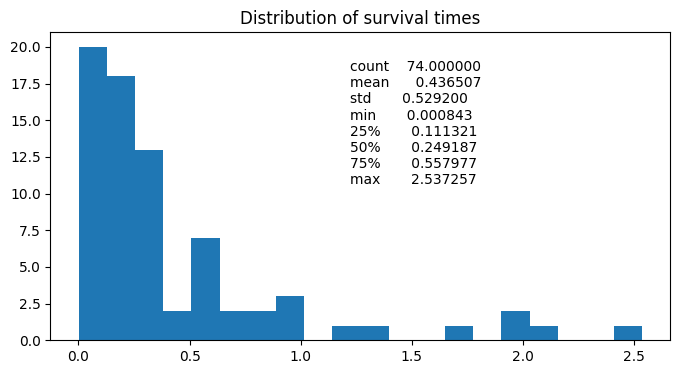

0.402
0.48


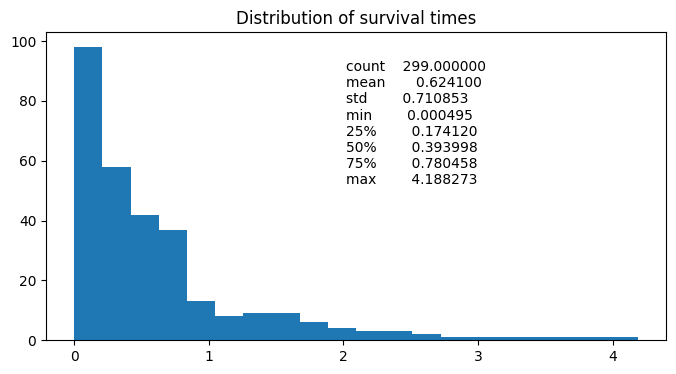

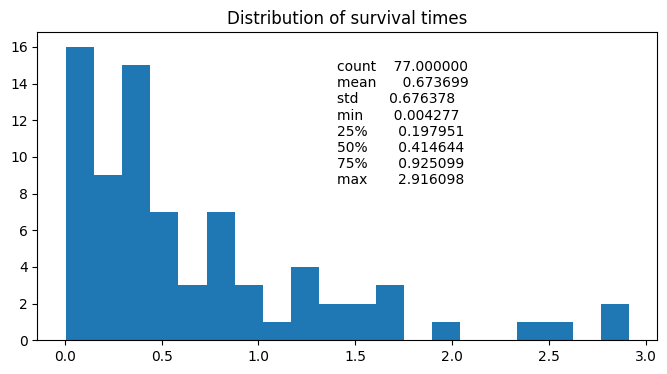

0.402
0.46


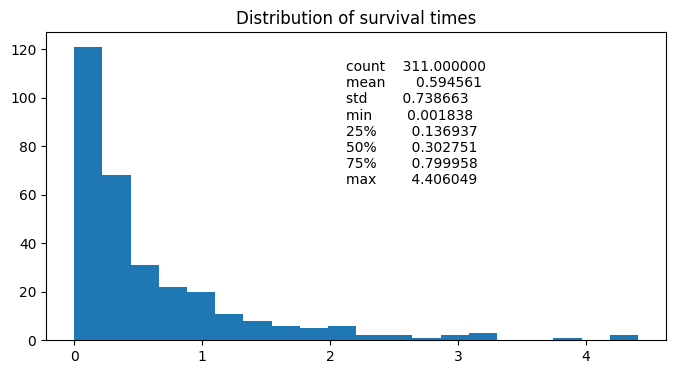

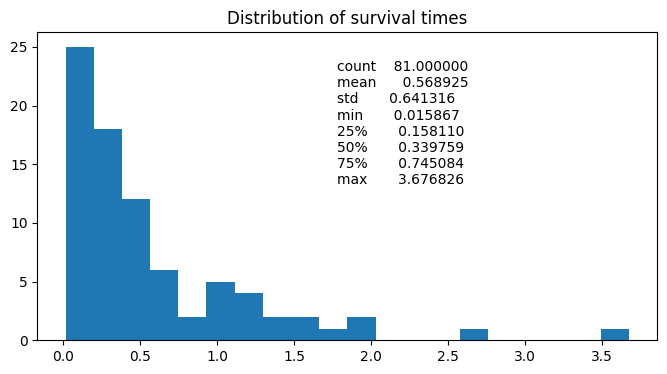

0.378
0.454


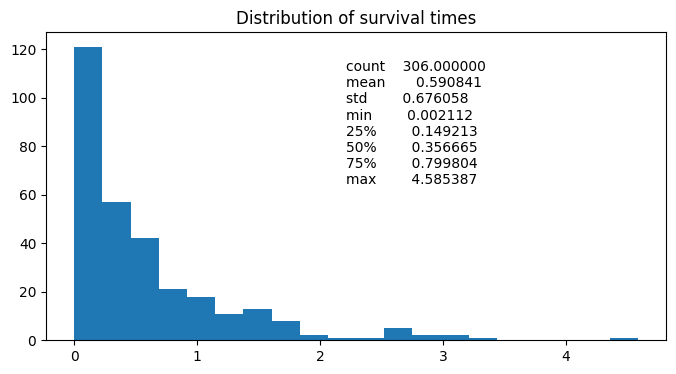

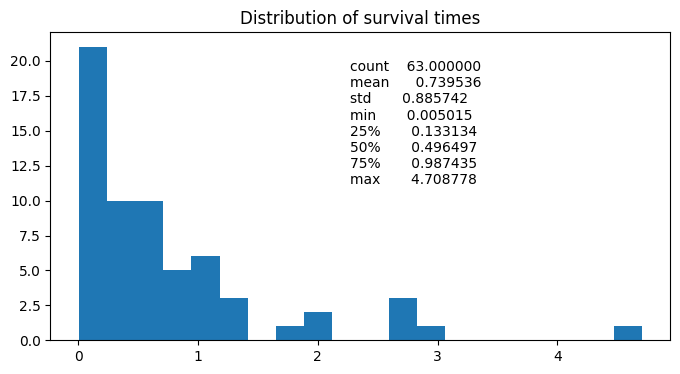

0.388
0.456


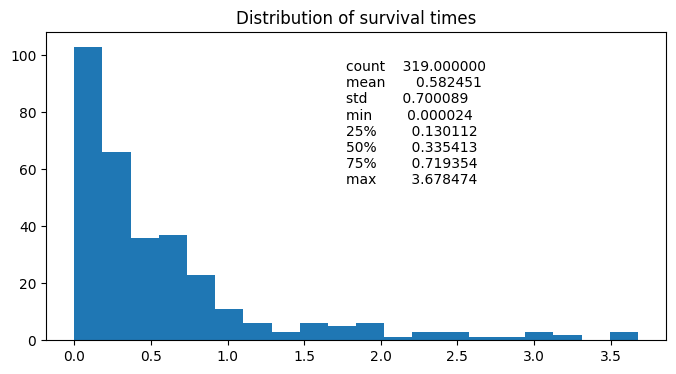

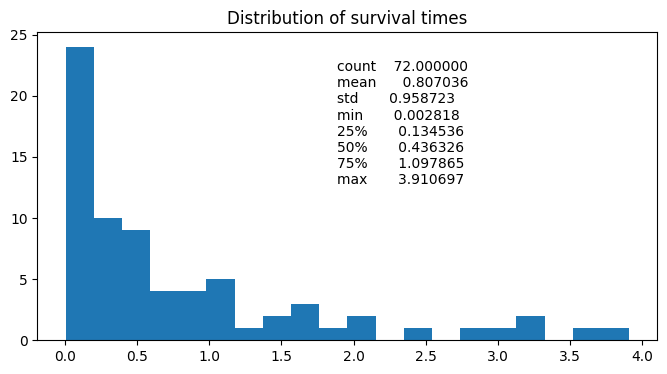

0.362
0.436


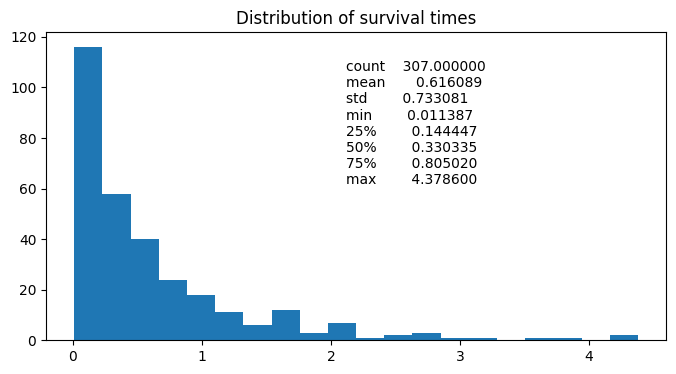

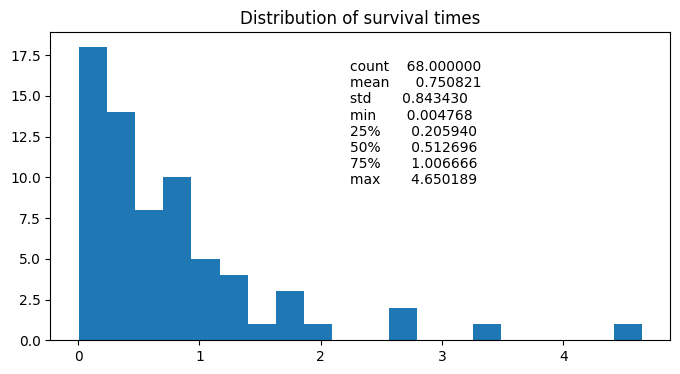

0.386
0.46


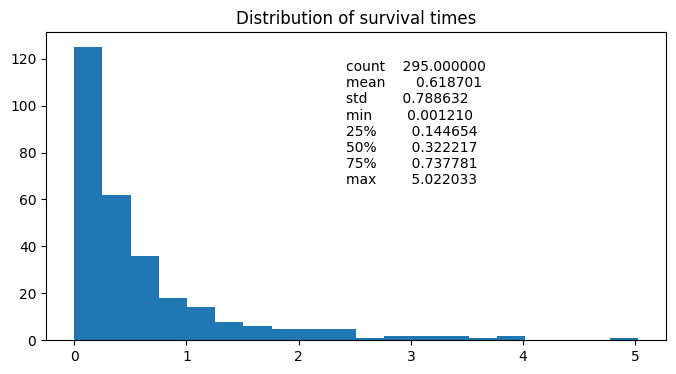

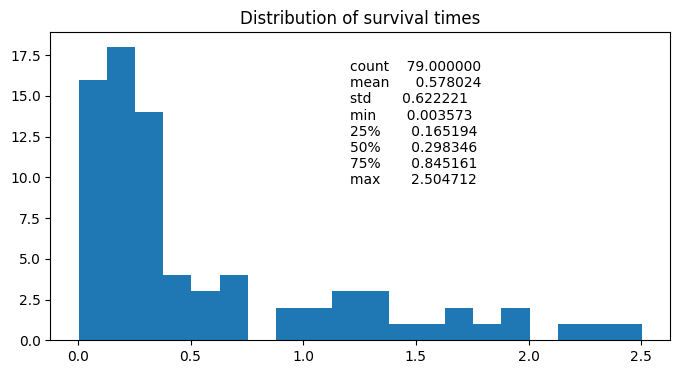

0.41
0.466


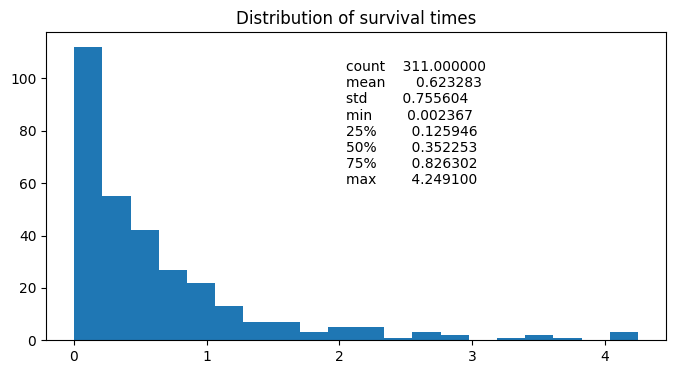

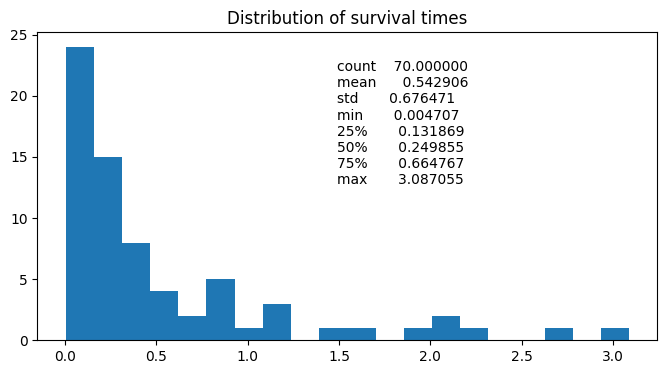

0.378
0.444


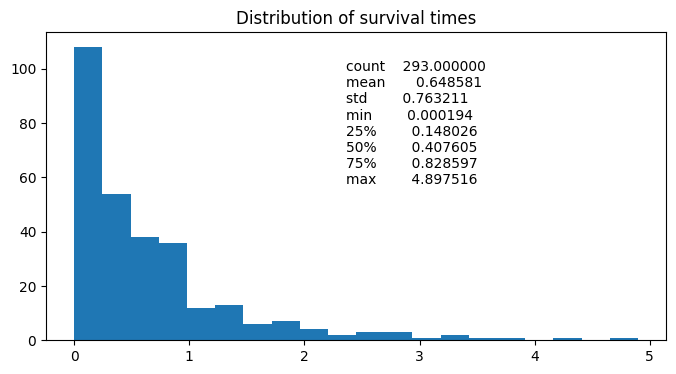

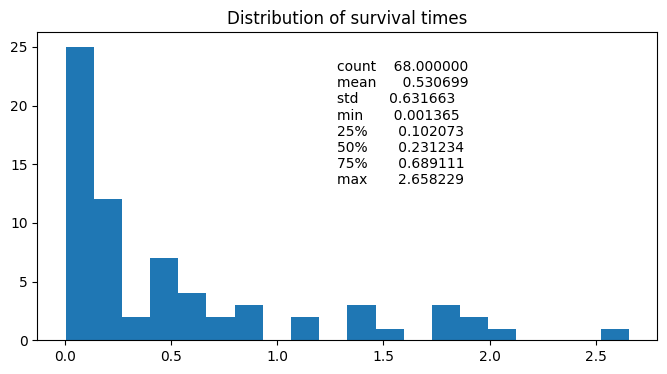

0.414
0.466


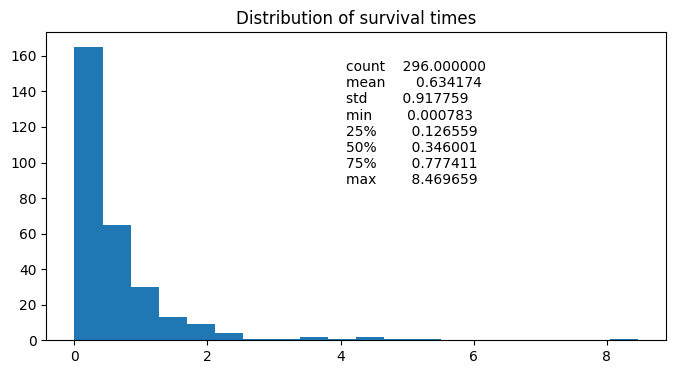

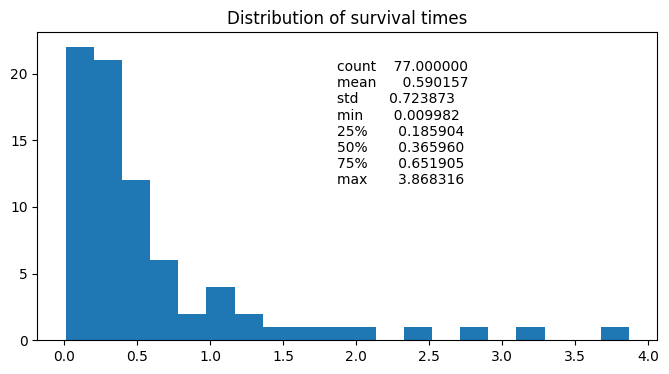

0.408
0.45


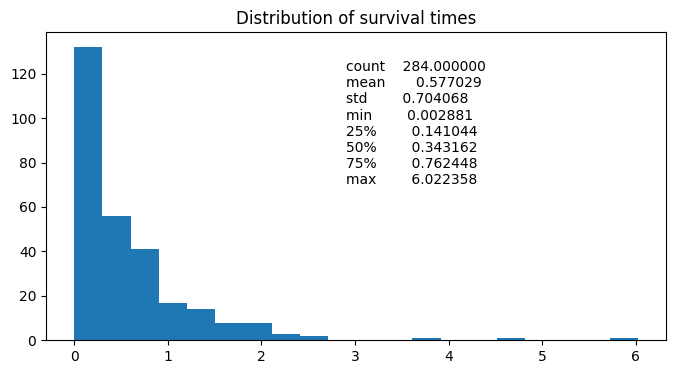

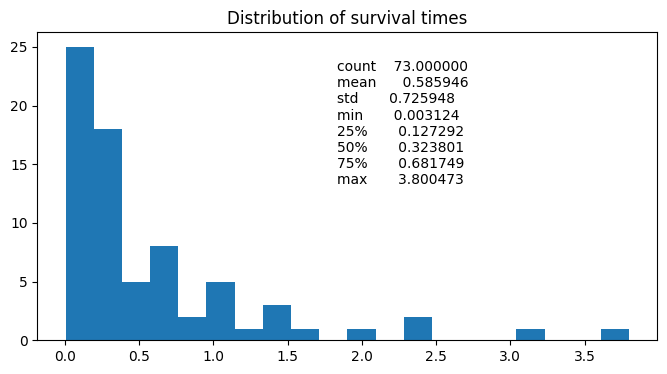

0.432
0.48


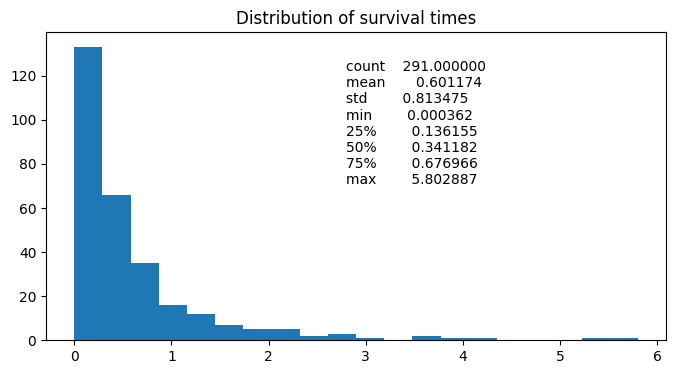

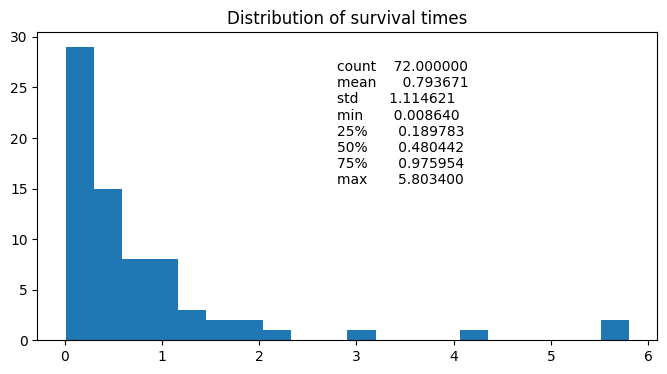

0.418
0.456


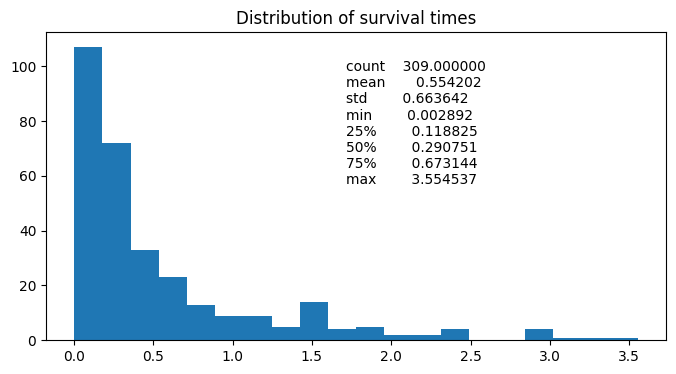

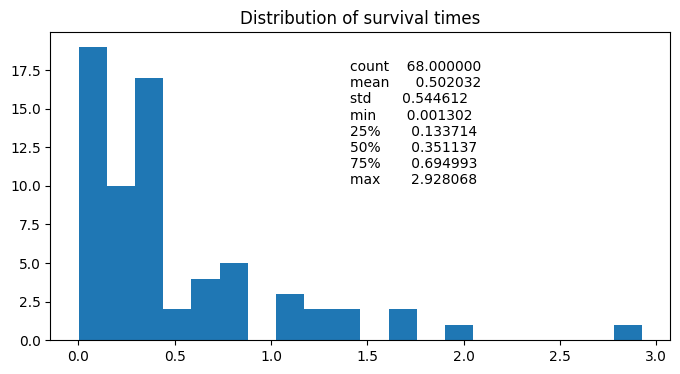

0.382
0.45


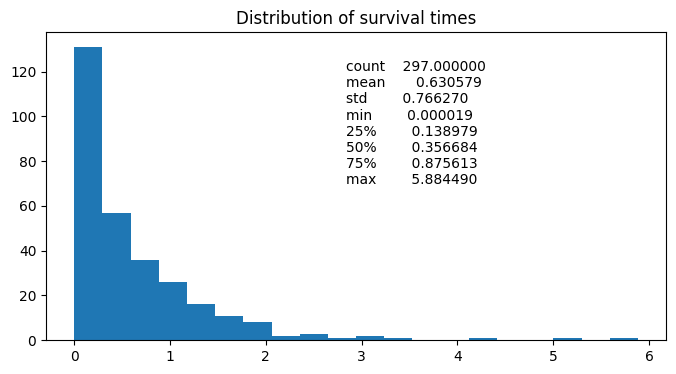

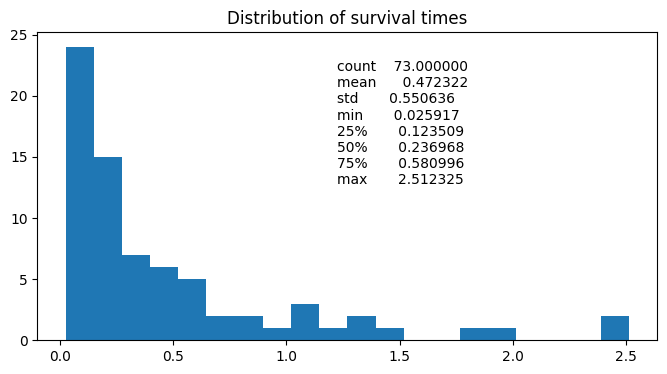

0.406
0.45


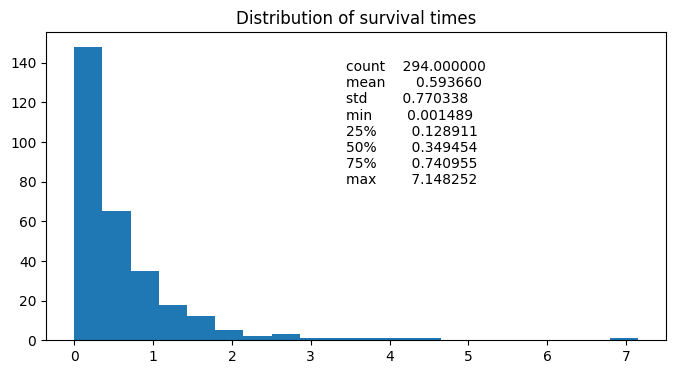

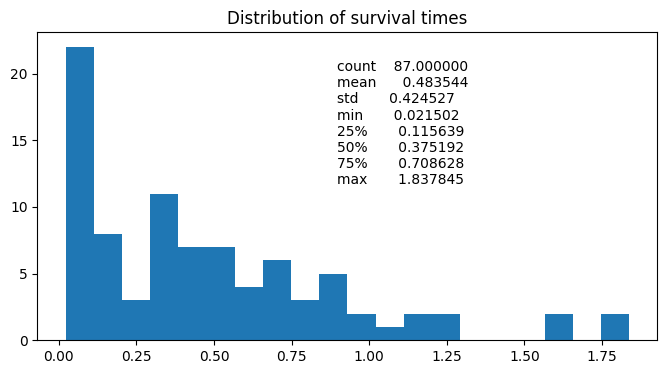

0.412
0.436


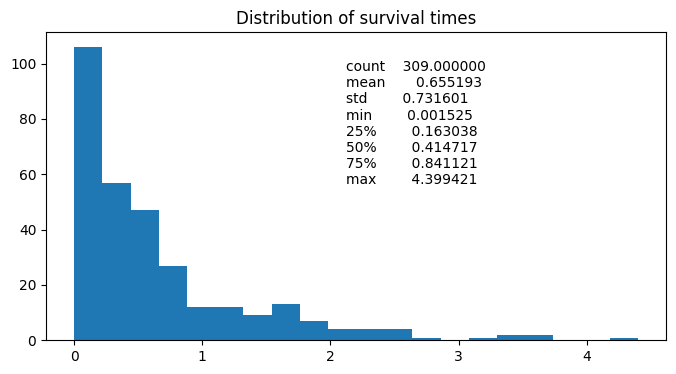

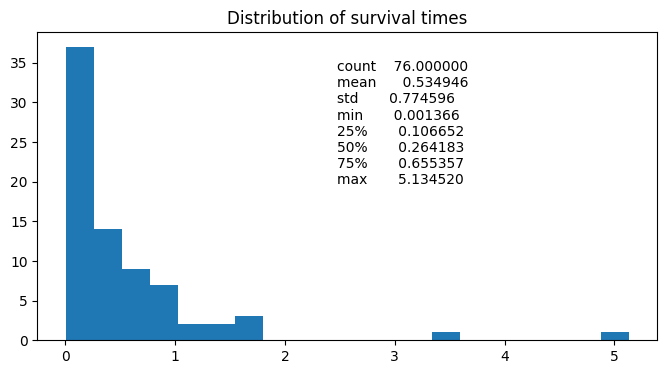

0.382
0.47


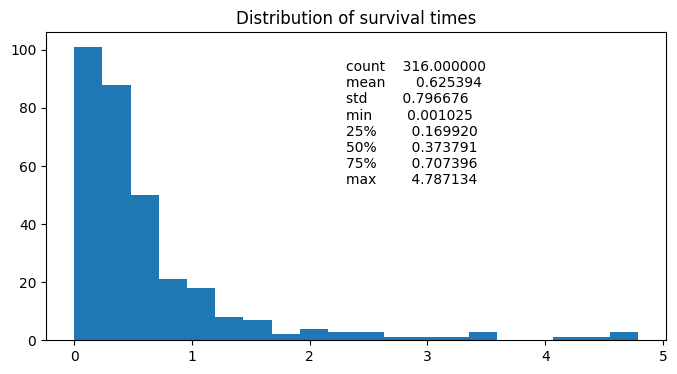

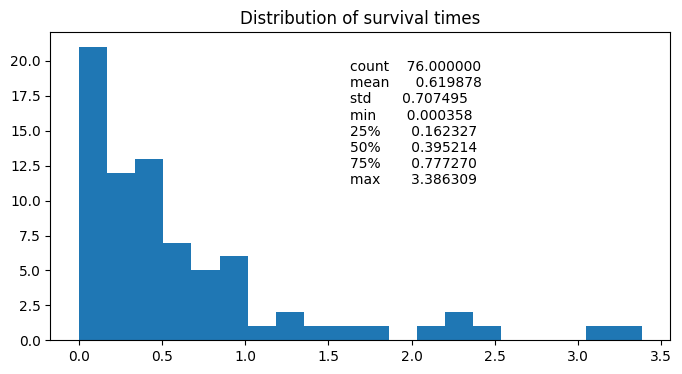

0.368
0.418


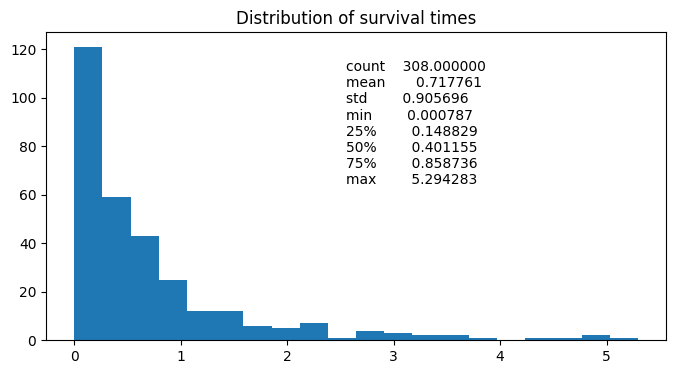

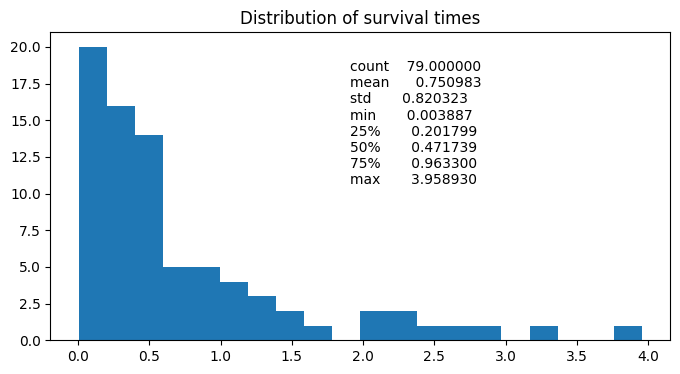

0.384
0.454


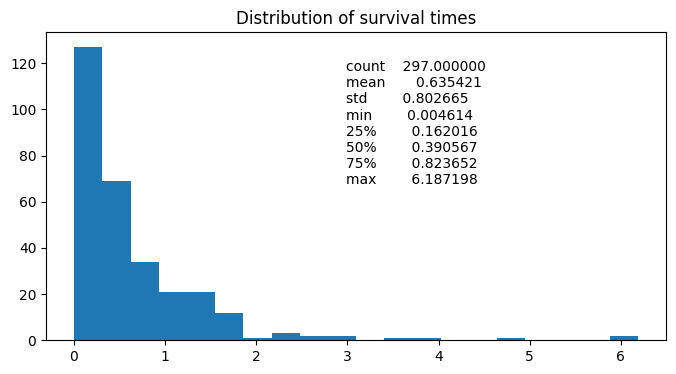

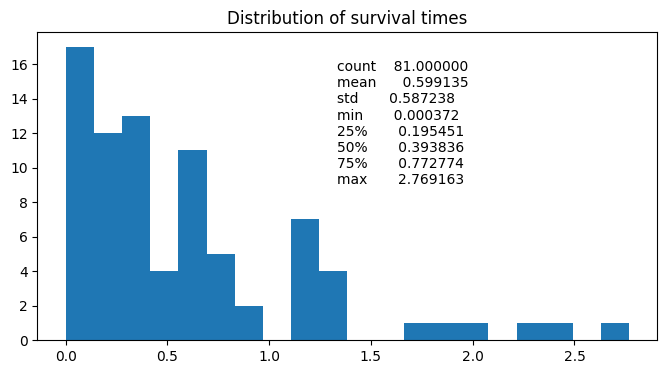

0.406
0.468


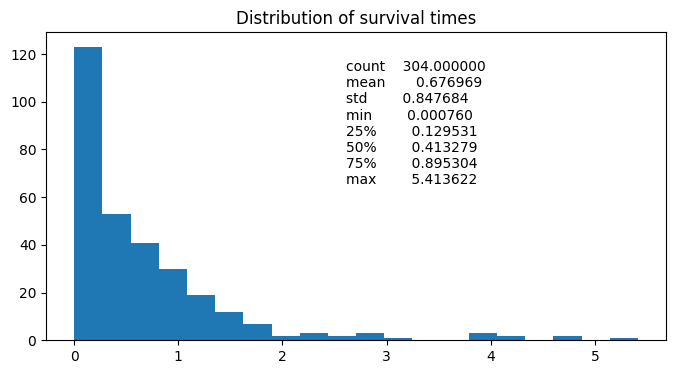

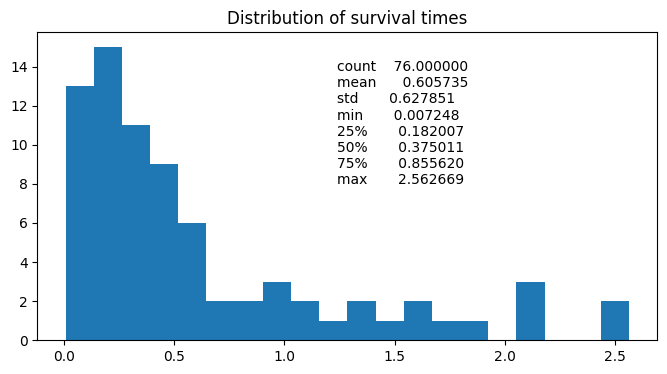

0.392
0.466


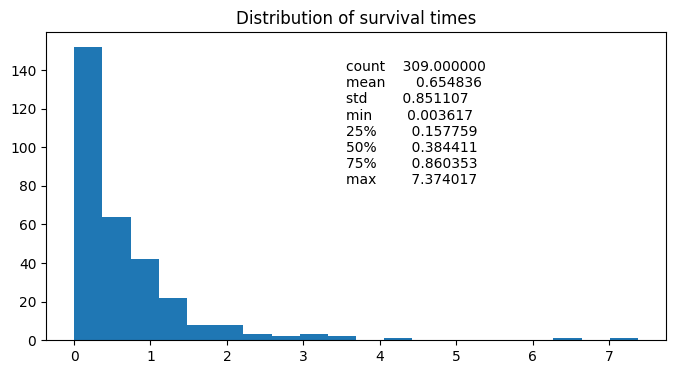

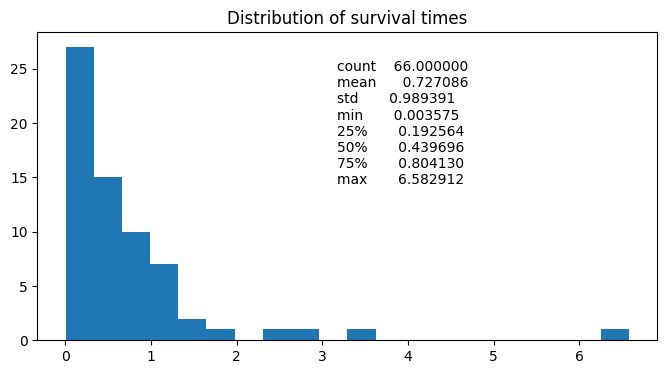

0.382
0.436


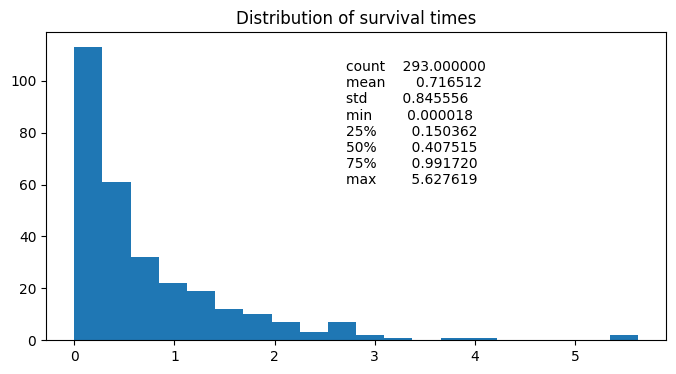

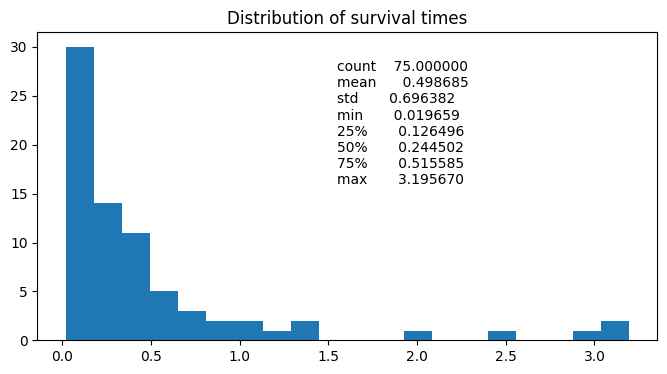

0.414
0.48


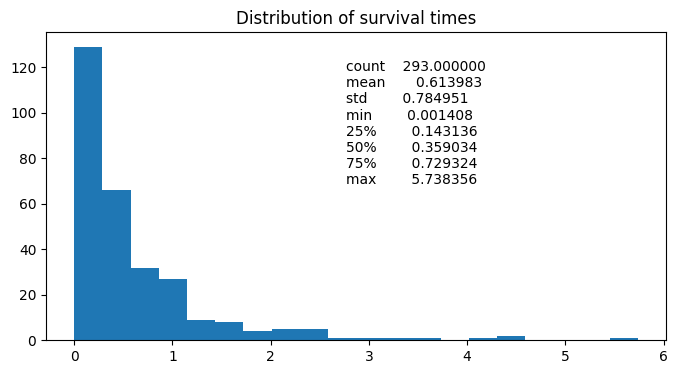

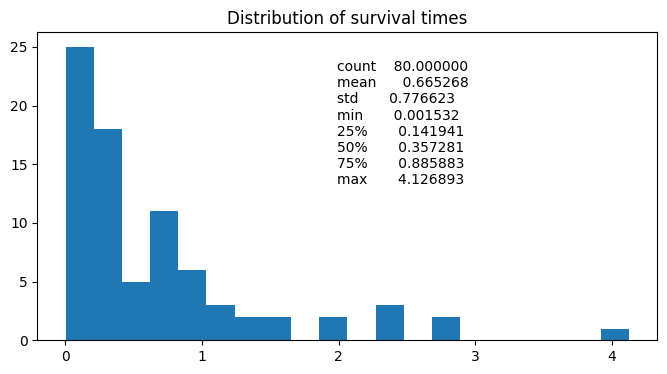

0.414
0.474


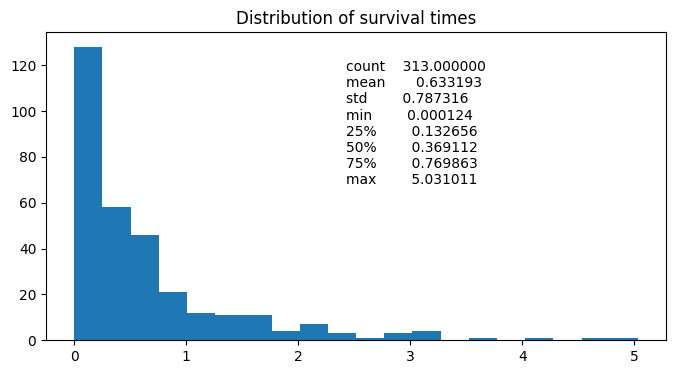

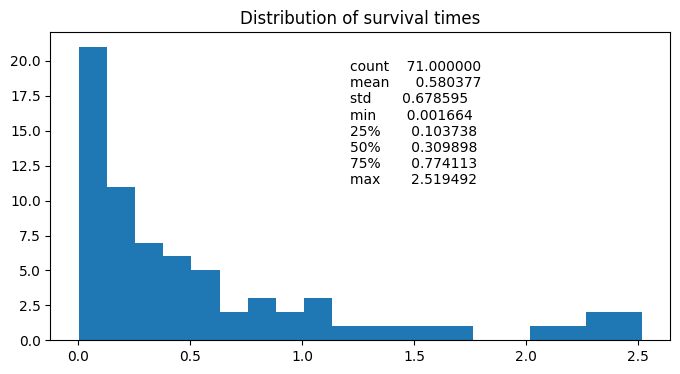

0.374
0.436


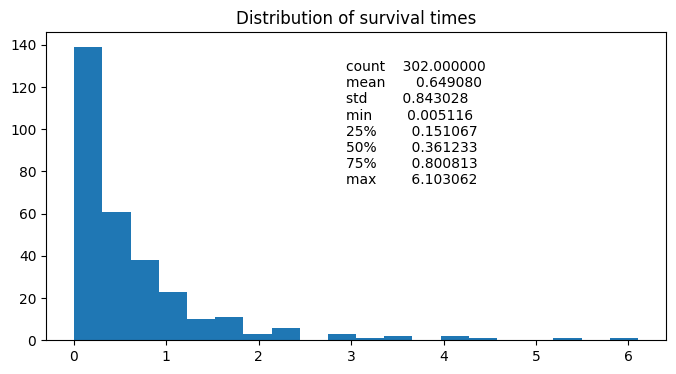

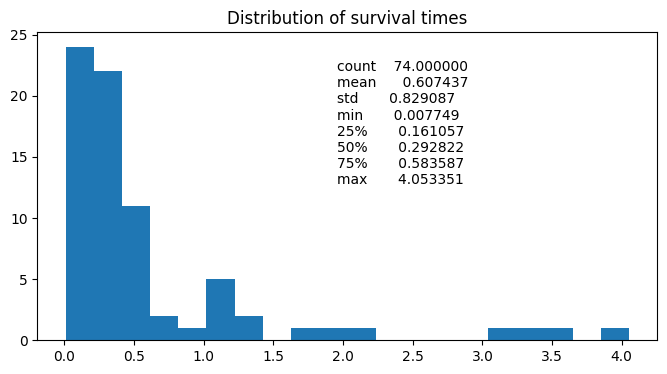

0.396
0.45


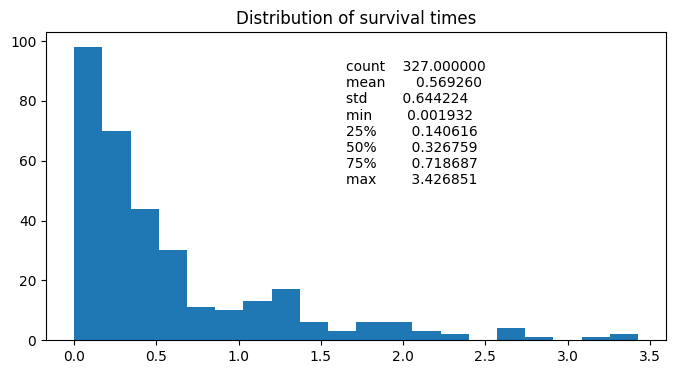

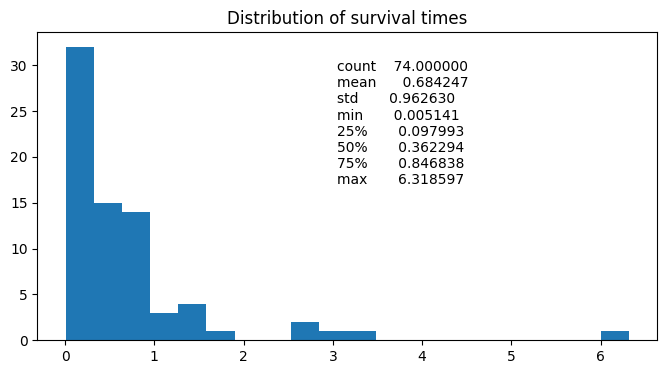

0.346
0.436


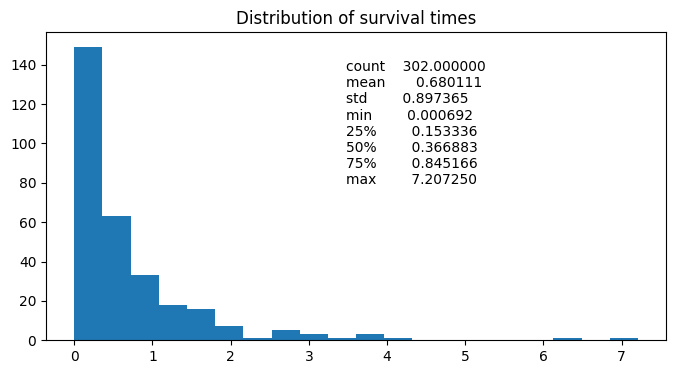

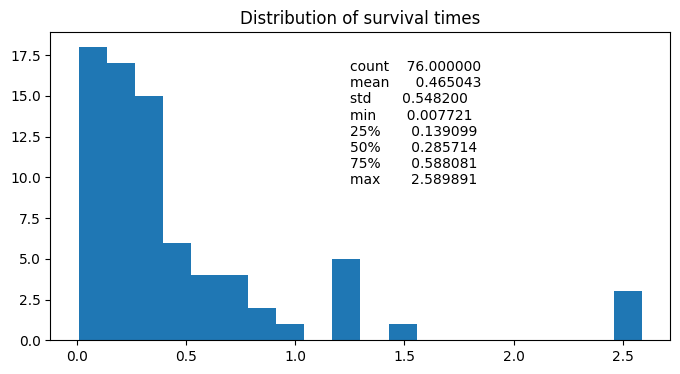

0.396
0.454


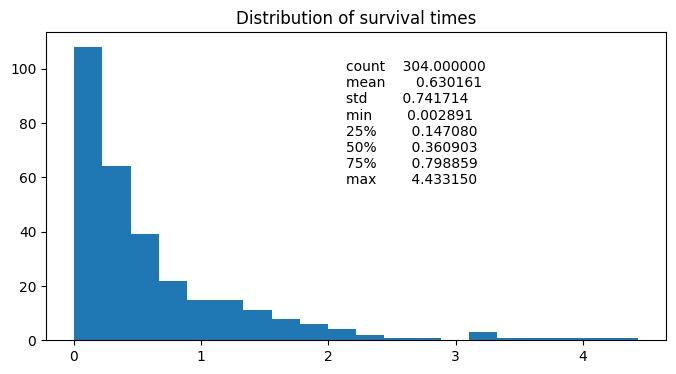

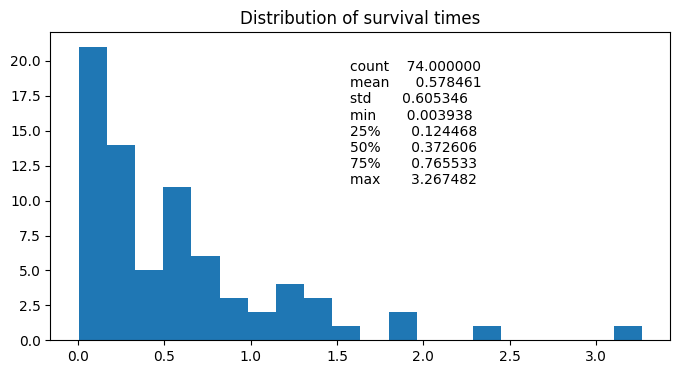

0.392
0.456


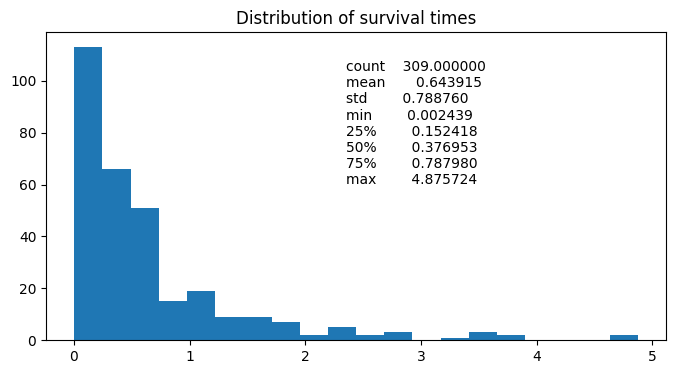

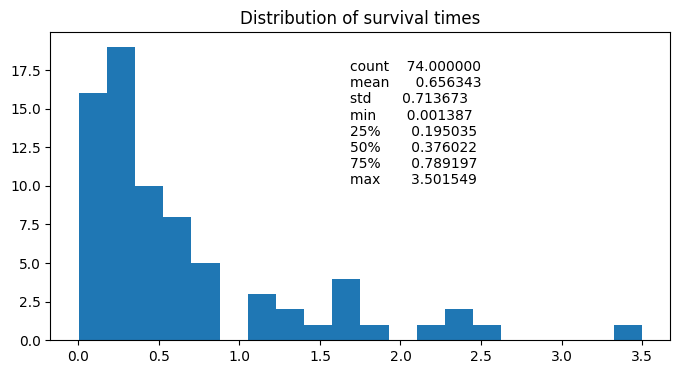

0.382
0.448


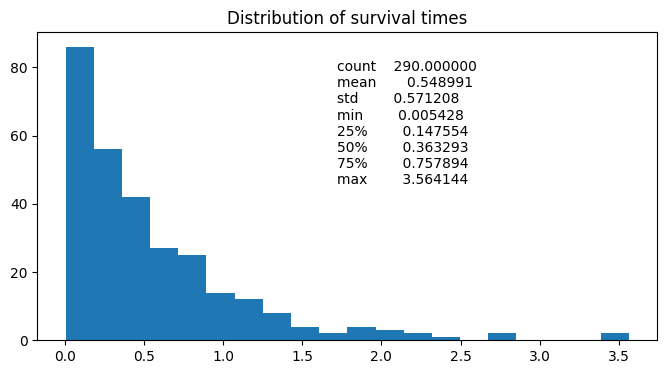

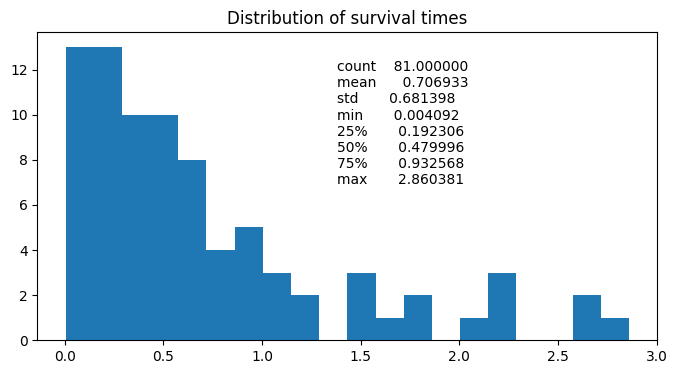

0.42
0.472


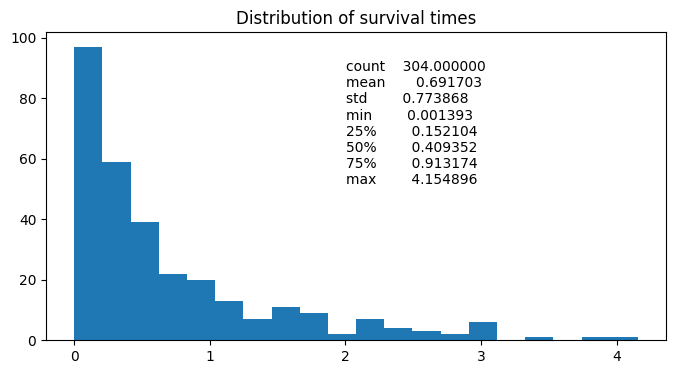

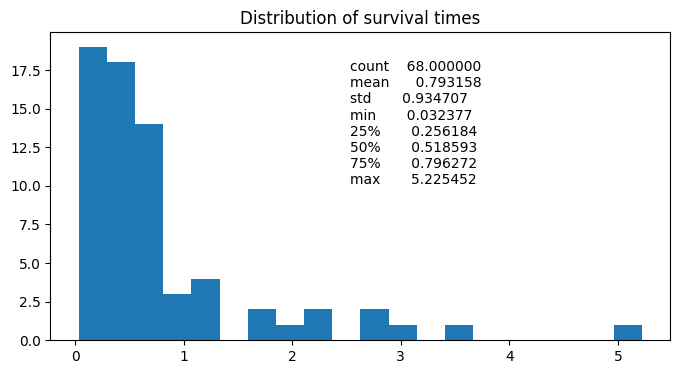

0.392
0.46


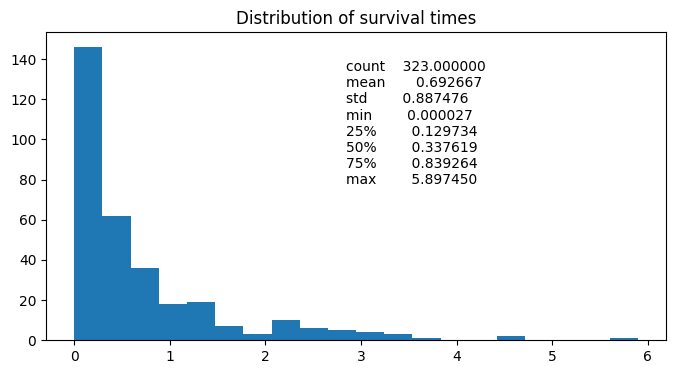

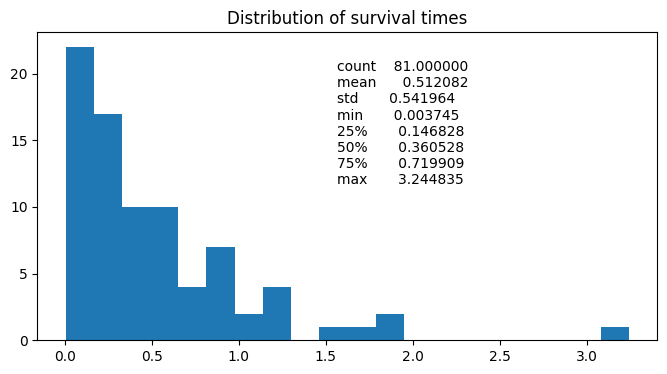

0.354
0.432


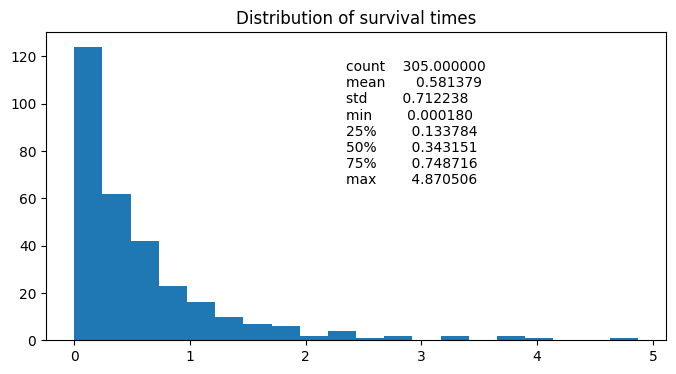

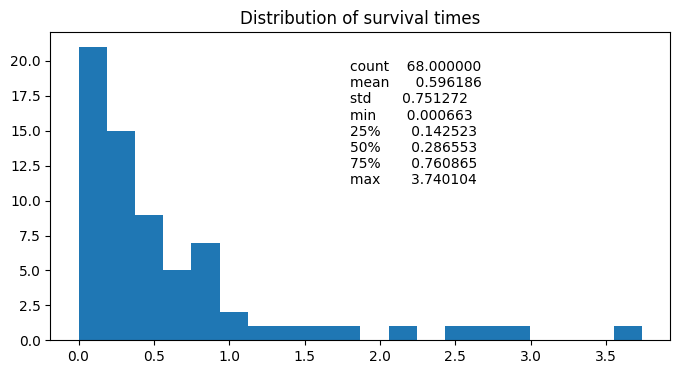

0.39
0.47


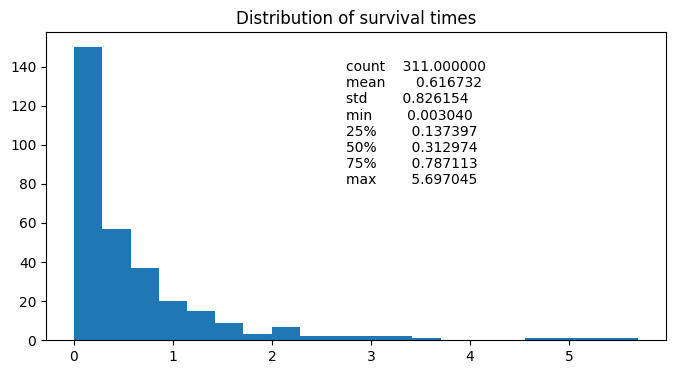

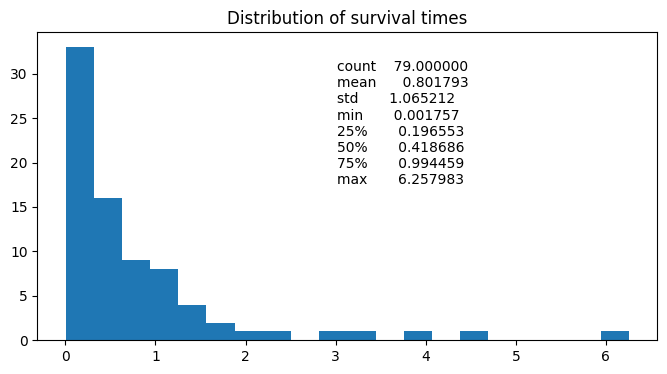

0.378
0.444


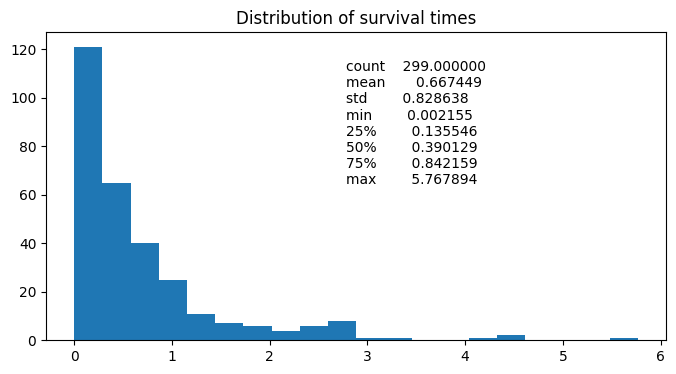

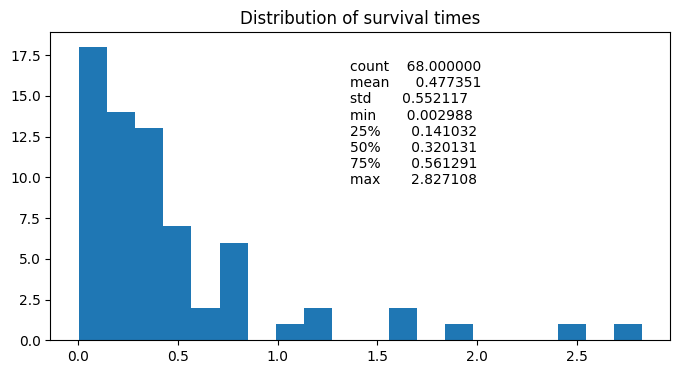

0.402
0.458


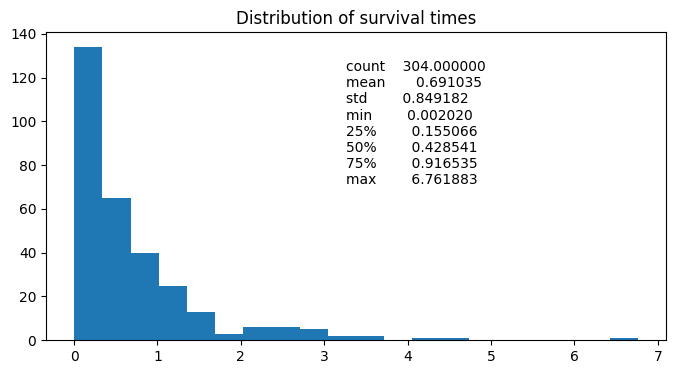

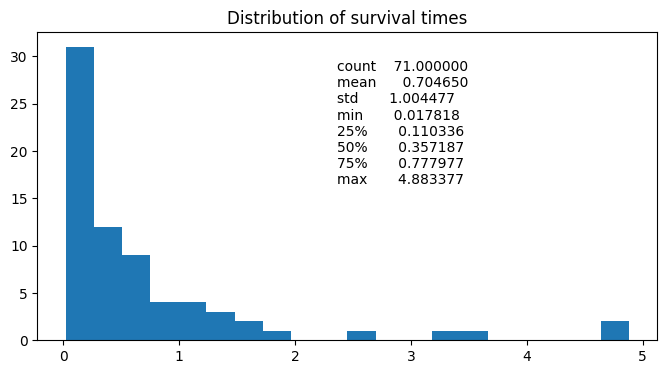

0.392
0.438


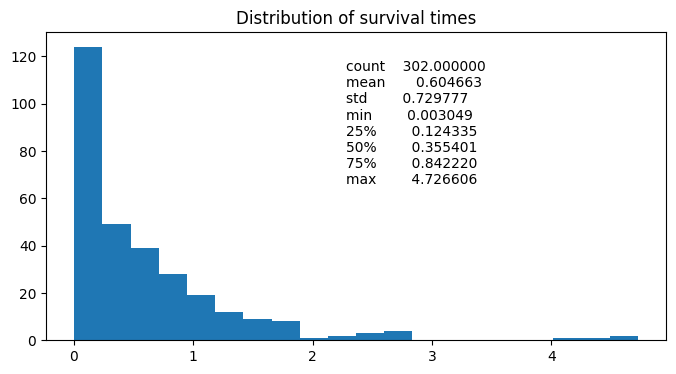

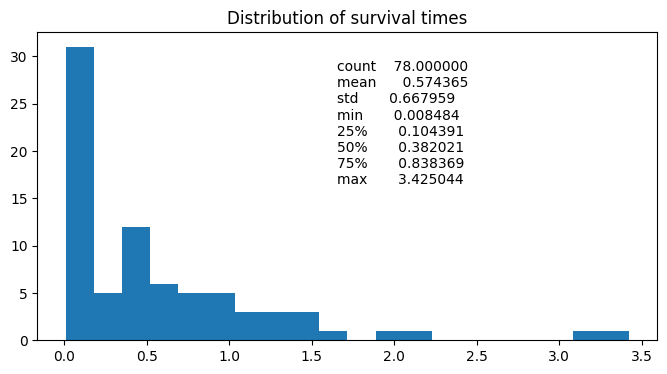

0.396
0.454


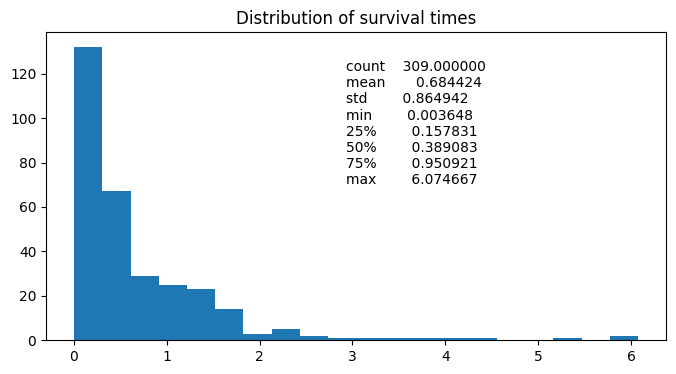

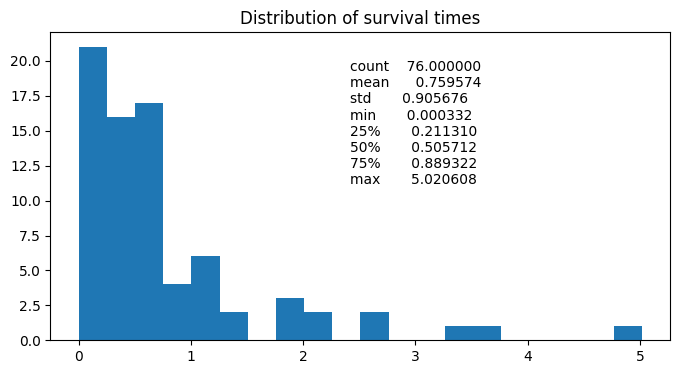

0.382
0.438
time: 1min 8s (started: 2023-10-05 23:33:10 +00:00)


In [ ]:
p_rate = []
c_rate = []
for sample in range(1,101):

  train_data = generateData.simulateData(labels = train_labels0,
                sampleIndex = generateData.samplingImg(labels = train_labels0, n = nTrain, p1 = 0.25),
                phi = 0.01,
                c_low = 0.01,
                poisson = True)

  test_data = generateData.simulateData(labels = test_labels0,
                           sampleIndex = generateData.samplingImg(labels = test_labels0, n = nTrain*0.25, p1 = 0.25),
                           phi = 0.01,
                           c_low = 0.01,
                           poisson = True)

  print(np.mean(train_data.m.values == 0))
  print(np.mean(train_data.delta.values == 0))

  p_rate.append(np.mean(train_data.m.values == 0))
  c_rate.append(np.mean(train_data.delta.values == 0))

  train_data.to_csv(path + str(sample) + "_TrainData" + '.csv', index=False)
  test_data.to_csv(path + str(sample) + "_TestData" + '.csv', index=False)

In [ ]:
pd.DataFrame({"Cura rate": p_rate, "Overall censoring rate": c_rate}).agg("mean")

Cura rate                 0.39380
Overall censoring rate    0.45526
dtype: float64

time: 6.81 ms (started: 2023-10-05 23:34:24 +00:00)


# Simulations (M $\sim$ Poisson)


In [ ]:
def calcPCML1(mi, theta):
  return -tf.reduce_mean(mi*theta - tf.exp(theta))

time: 547 µs (started: 2023-10-06 14:25:19 +00:00)


In [ ]:
# @title Run nb data
phi = 2 # @param {type:"number"}
nTrain = 500 # @param {type:"number"}
data_path = "phi" + str(phi) + "/n" + str(nTrain) + "/"
save_path = "/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/phi" + str(phi) + "/n" + str(nTrain) + "/"
print(data_path)
print(save_path)

phi2/n500/
/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/phi2/n500/
time: 1.91 ms (started: 2023-10-06 14:25:33 +00:00)


In [ ]:
# @title Run poisson data
nTrain = 500 # @param {type:"number"}
data_path = save_path = "/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/n" + str(nTrain) + "/"
print(data_path)
print(save_path)

/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/n500/
/content/drive/MyDrive/Mestrado/PCM/simulation/Poisson/n500/
time: 793 µs (started: 2023-10-05 23:35:06 +00:00)


In [ ]:
params = []
for sample in range(1,101):

  train_data = pd.read_csv(data_path + str(sample) + "_TrainData" + '.csv')
  test_data = pd.read_csv(data_path + str(sample) + "_TestData" + '.csv')

  i_train = train_data["index"].values
  i_test = test_data["index"].values

  train_img = train_img0[i_train]
  test_img = test_img0[i_test]

  model = Model1()  # 卷积类
  optimizer = tf.optimizers.Adam(learning_rate=0.0001)
  num_batches = 2000

  # first training
  matNumTrain, matDenomTrain = nbCure.calc_mat(train_data)
  matNumTest, matDenomTest = nbCure.calc_mat(test_data)
  deltaTrain = tf.convert_to_tensor(train_data['delta'].values.reshape(-1, 1), dtype=tf.float32)
  deltaTest = tf.convert_to_tensor(test_data['delta'].values.reshape(-1, 1), dtype=tf.float32)

  mi = deltaTrain + 1e-10

  alpha = nbCure.calc_alpha(mi, deltaTrain, matNumTrain, matDenomTrain)
  alpha_record = alpha.numpy().copy()

  S1 = nbCure.calc_S1(alpha, matDenomTrain)

  with tf.GradientTape() as tape:
      loss = calcPCML1(mi, model(train_img))
      print("iter %d: loss %f" % (1, loss.numpy()))
  grads = tape.gradient(loss, model.variables)
  optimizer.apply_gradients(grads_and_vars = zip(grads, model.variables))

  var_list = []
  for l in range(len(model.variables)):
      var_list.append(tf.squeeze(model.variables[l]).numpy())
  var_record = np.concatenate(list(map(lambda x: x.reshape(-1), var_list))).copy()  # record

  #  second training ---------------------------------------------------
  eps = 100
  num_iter = 1

  while eps > 1e-5 and num_iter <= 30:
      minimal = 100.
      early_stopping_at = -1
      count_patience = 0
      patience = 5

      # update yi
      mi = tf.exp(model(train_img))*S1 + deltaTrain

      # update alpha, S1
      alpha = nbCure.calc_alpha(mi, deltaTrain, matNumTrain, matDenomTrain)
      S1 = nbCure.calc_S1(alpha, matDenomTrain)

      #  test loss
      S1_t = nbCure.calc_S1(alpha, matDenomTest)
      mi_t = np.exp(model(test_img))*S1_t + deltaTest

      for epoch in range(num_batches):
          with tf.GradientTape() as tape:
              loss = calcPCML1(mi, model(train_img))
              loss_t = calcPCML1(mi_t, model(test_img))

              if epoch % 1000 == 0:
                  print("# %d: loss %4f, loss_t %4f" % (num_iter, loss.numpy(), loss_t.numpy()))
          grads = tape.gradient(loss, model.variables)
          optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

          # early stopping ------------------------------
          if loss_t < minimal:
              minimal = loss_t.numpy().copy()
              early_stopping_at = epoch
              best_variable = model.variables
              count_patience = 0

          else:
              count_patience += 1

          if count_patience > patience:
              break


      var_list = []
      for l in range(len(model.variables)):
          var_list.append(tf.squeeze(model.variables[l]).numpy())
      var_new = np.concatenate(list(map(lambda x: x.reshape(-1), var_list))).copy()

      eps = np.mean((var_new - var_record) ** 2) + np.mean((alpha - alpha_record) ** 2)
      var_record = var_new.copy()
      alpha_record = alpha.numpy().copy()

      print("# %d ε: %6f, early stops @E%d" % (num_iter, eps, early_stopping_at))

      # iteration+1
      num_iter += 1

  # update all parameters
  S1 = nbCure.calc_S1(alpha, matDenomTrain)
  mi = tf.exp(model(train_img))*S1 + deltaTrain
  alpha = nbCure.calc_alpha(mi, deltaTrain, matNumTrain, matDenomTrain)

  eta = model(train_img).numpy()
  train_res = pd.DataFrame(np.concatenate([eta, mi.numpy(), S1.numpy()], axis=1), columns=['eta', 'mi','S1'])

  S1_t = nbCure.calc_S1(alpha, matDenomTest)
  mi_t = np.exp(model(test_img))*S1_t + deltaTest
  eta_t = model(test_img).numpy()
  test_res = pd.DataFrame(np.concatenate([eta_t, mi_t.numpy(), S1_t.numpy()], axis=1), columns=['eta', 'mi', 'S1'])

  train_res.to_csv(save_path + str(sample) + '_TrainRes.csv', index=False)
  test_res.to_csv(save_path + str(sample) + '_TestRes.csv', index=False)

  params.append(tf.squeeze(alpha).numpy())
  del model


iter 1: loss 0.914422


# 1: loss 0.969702, loss_t 0.965334
# 1 ε: 0.492279, early stops @E0
# 2: loss 0.977636, loss_t 0.966234
# 2 ε: 0.011271, early stops @E2
# 3: loss 0.982705, loss_t 0.976839
# 3 ε: 0.010926, early stops @E0
# 4: loss 0.982815, loss_t 0.977612
# 4 ε: 0.001042, early stops @E5
# 5: loss 0.980711, loss_t 0.978200
# 5 ε: 0.000314, early stops @E0
# 6: loss 0.979237, loss_t 0.979179
# 6 ε: 0.000115, early stops @E0
# 7: loss 0.977432, loss_t 0.979976
# 7 ε: 0.000067, early stops @E0
# 8: loss 0.975149, loss_t 0.980014
# 8 ε: 0.000020, early stops @E0
# 9: loss 0.972500, loss_t 0.980268
# 9 ε: 0.000039, early stops @E0
# 10: loss 0.969210, loss_t 0.980334
# 10 ε: 0.000023, early stops @E0
# 11: loss 0.965410, loss_t 0.980514
# 11 ε: 0.000021, early stops @E0
# 12: loss 0.961148, loss_t 0.980146
# 12 ε: 0.000026, early stops @E9
# 13: loss 0.949556, loss_t 0.978773
# 13 ε: 0.000078, early stops @E0
# 14: loss 0.943771, loss_t 0.978360
# 14 ε: 0.000045, early stops @E0
# 15: loss 0.937357, los

In [ ]:
params=pd.DataFrame(params, columns=["1", "2", "3", "4", "5"]); params

1         2         3         4         5
0   2.392093  1.843144  1.593979  1.782199  1.442644
1   2.122998  1.656752  1.490403  1.528962  1.338422
2   1.970636  1.936767  1.246710  0.877220  1.007360
3   2.410688  1.916980  1.841795  1.440996  1.354470
4   1.714452  2.184854  2.000864  1.439961  0.937016
..       ...       ...       ...       ...       ...
95  2.335420  2.040122  2.131970  1.339378  1.362154
96  1.968502  1.217067  1.174787  1.080757  0.847997
97  1.749069  2.059182  1.754962  1.392603  1.181977
98  3.281205  2.837185  1.888283  1.327816  1.483453
99  2.575994  3.006361  2.187553  1.606774  1.524803

[100 rows x 5 columns]

time: 17.6 ms (started: 2023-10-06 15:00:52 +00:00)


In [ ]:
params.to_csv(save_path + 'params_n' + str(nTrain) + '.csv', index=False)

time: 13 ms (started: 2023-10-06 15:00:55 +00:00)
